# Project for Model Selection

### Aim: This Project Aims to Perform or resolve following tasks:
- To Preprocess the Collected data using some **Statistical Techniques**
- To Train Variour Regression Model and Evaluate Performance of the model.

### Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
filename='https://github.com/re4lvanshsingh/Codeforces_Codechef_Converter/raw/main/Scrapper/csv/ratings_users.csv'
df=pd.read_csv(filename)

df.rename(columns={'CAcc ': 'CFAcc'}, inplace=True)
df.rename(columns={'CAcc': 'CCAcc'}, inplace=True)
del df['Unnamed: 0']

There are some missing data in the dataset. Mostly because the data is for last five contests of the user but there are users that hasn't even been part of five contests.

*One way to adress the issue would be to replace the missing ratings with zero for codeforces, but what about contest ranks. There doesn't seem any good way to deal with missing ranks.*
###### ```for cname in [list of missing columns]:   df[cname].fillna(0, inplace=True)```

Therefore I am deleting all the rows with missing data, that still leave us with 310 data points which is more than 300 and sufficient for the model.

In [ ]:
df.dropna(inplace=True)

The Dataset is split into two portions both for each model.

### Some visualization to get insight about relation between the data and label

Plots for Codechef Data and Corresponding Rating in CodeForces

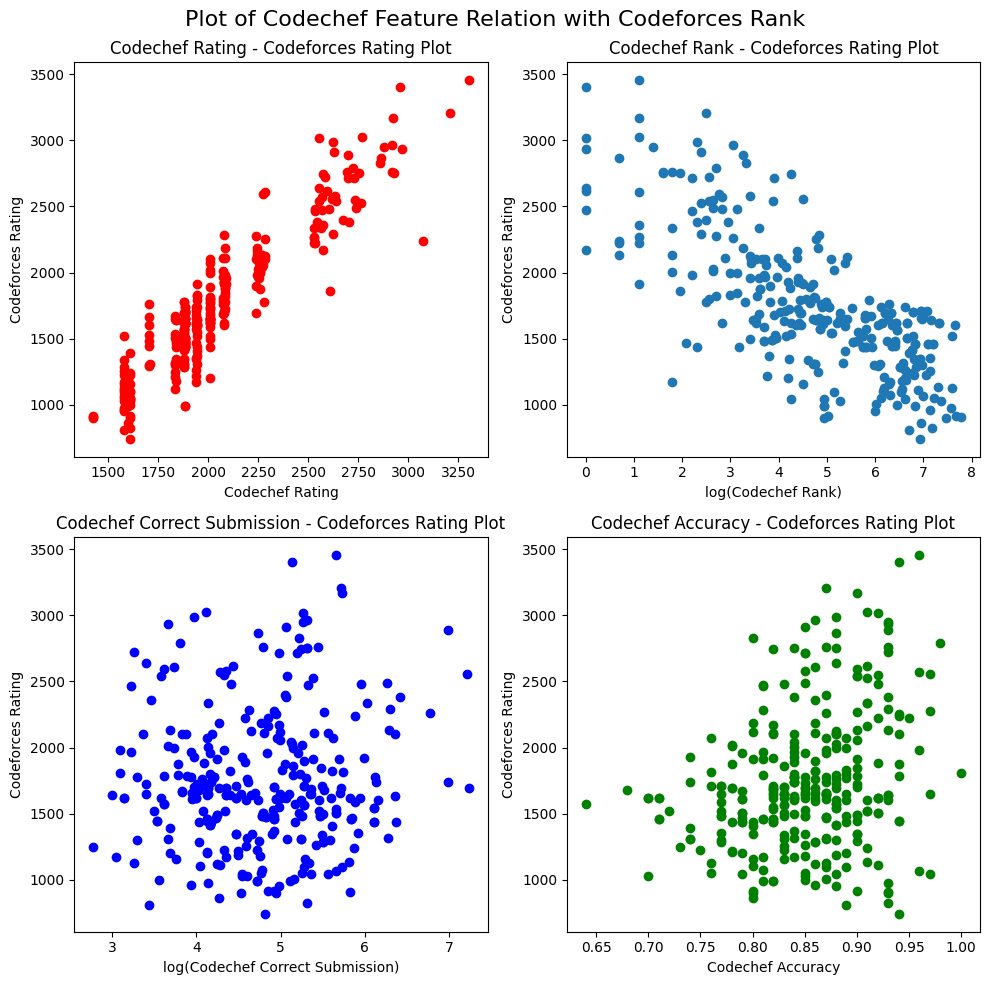

In [ ]:
from matplotlib import cm
fig=plt.figure(figsize=(10, 10), dpi=100)

axes=fig.add_subplot(2, 2, 1)
axes.scatter(df['CRating1_y'], df['CurrentRating'], c='r')
axes.set(xlabel='Codechef Rating', ylabel='Codeforces Rating', title='Codechef Rating - Codeforces Rating Plot')

axes=fig.add_subplot(2, 2, 2)
axes.scatter(np.log(df['CRank1_y']), df['CurrentRating'])
axes.set(xlabel='log(Codechef Rank)', ylabel='Codeforces Rating', title='Codechef Rank - Codeforces Rating Plot', )

axes=fig.add_subplot(2, 2, 3)
axes.scatter(np.log(df['CC_y']), df['CurrentRating'], c='b')
axes.set(xlabel='log(Codechef Correct Submission)', ylabel='Codeforces Rating', title='Codechef Correct Submission - Codeforces Rating Plot', )

axes=fig.add_subplot(2, 2, 4)
axes.scatter(df['CCAcc'], df['CurrentRating'], c='g')
axes.set(xlabel='Codechef Accuracy', ylabel='Codeforces Rating', title='Codechef Accuracy - Codeforces Rating Plot', )
fig.suptitle('Plot of Codechef Feature Relation with Codeforces Rank', fontsize=16)
fig.tight_layout()

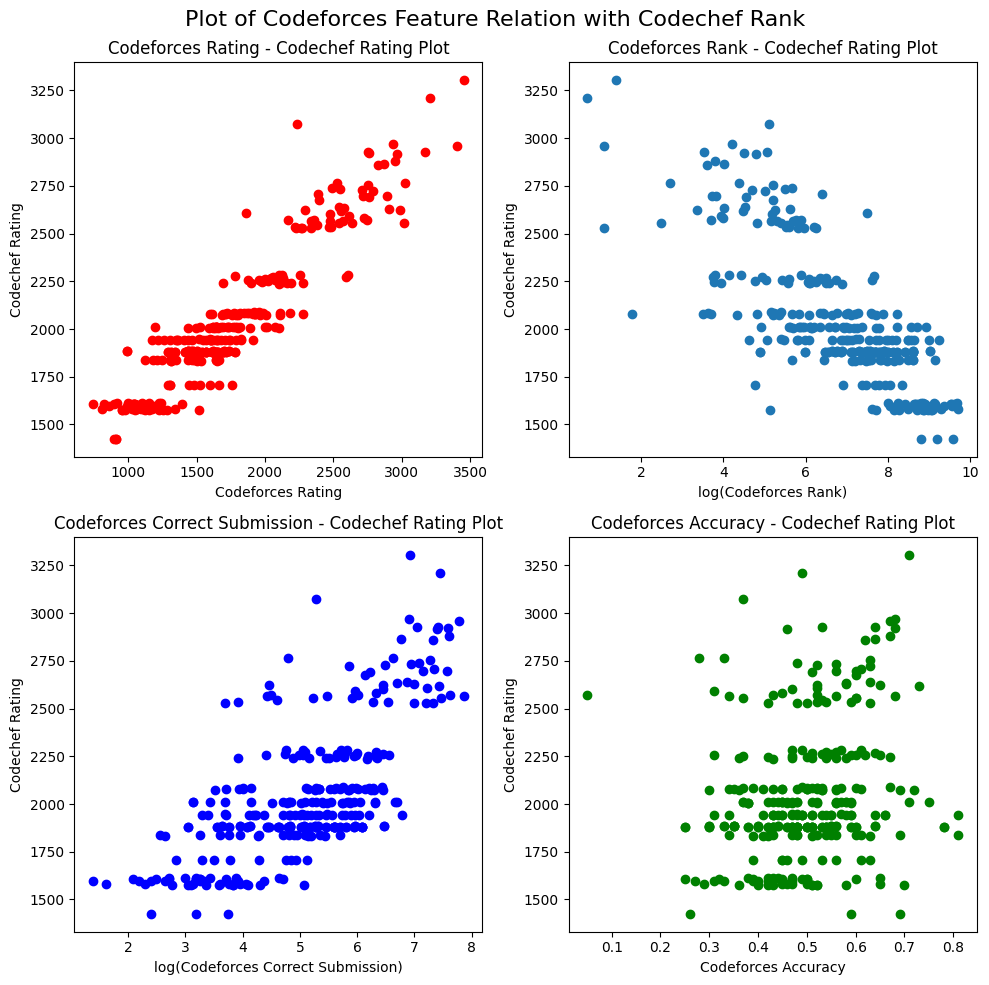

In [ ]:
fig1=plt.figure(figsize=(10, 10), dpi=100)

axes1=fig1.add_subplot(2, 2, 1)
axes1.scatter(df['CRating1_x'], df['CRating1_y'], c='r')
axes1.set(xlabel='Codeforces Rating', ylabel='Codechef Rating', title='Codeforces Rating - Codechef Rating Plot')

axes1=fig1.add_subplot(2, 2, 2)
axes1.scatter(np.log(df['CRank1_x']), df['CRating1_y'])
axes1.set(xlabel='log(Codeforces Rank)', ylabel='Codechef Rating', title='Codeforces Rank - Codechef Rating Plot', )

axes1=fig1.add_subplot(2, 2, 3)
axes1.scatter(np.log(df['CC_x']), df['CRating1_y'], c='b')
axes1.set(xlabel='log(Codeforces Correct Submission)', ylabel='Codechef Rating', title='Codeforces Correct Submission - Codechef Rating Plot', )

axes1=fig1.add_subplot(2, 2, 4)
axes1.scatter(df['CFAcc'], df['CRating1_y'], c='g')
axes1.set(xlabel='Codeforces Accuracy', ylabel='Codechef Rating', title='Codeforces Accuracy - Codechef Rating Plot', )
fig1.suptitle('Plot of Codeforces Feature Relation with Codechef Rank', fontsize=16)
fig1.tight_layout()

### Following Things are evident from the Data:
- Ratings in other platform has positive coorelation with ratings in one platform.
- Ratings has negative coorelation with logarithm of Contest Ranks
- Ratings has some positive coorelation with logarithm of total number of Correct submission.
- In case of accuracy there is poor coorelation between data and its hard to predict any trend.
  

*Adding the Coorelated Columns in the dataframe*

## Using Only Ratings Column to Train Models

In [ ]:
for i in range(5):
    df[f'CRating{i+1}_x2']=df[f'CRating{i+1}_x']**2
    df[f'CRating{i+1}_y2']=df[f'CRating{i+1}_y']**2
    df[f'CRating{i+1}_x3']=df[f'CRating{i+1}_x']**3
    df[f'CRating{i+1}_y3']=df[f'CRating{i+1}_y']**3

feature_list_CC=[f'CRating{i+1}_y' for i in range(5)]+[f'CRating{i+1}_y2' for i in range(5)]+[f'CRating{i+1}_y3' for i in range(5)]
feature_list_CF=['MaxRating']+[f'CRating{i+1}_x' for i in range(5)]+[f'CRating{i+1}_x2' for i in range(5)]+[f'CRating{i+1}_x3' for i in range(5)]

In [ ]:
label_list_CC=['CurrentRating']
label_list_CF=['CRating1_y']
fCC=df[feature_list_CC]
fCF=df[feature_list_CF]
lCC=df[label_list_CC]
lCF=df[label_list_CF]

## The Coorelation is evident from following heatmap

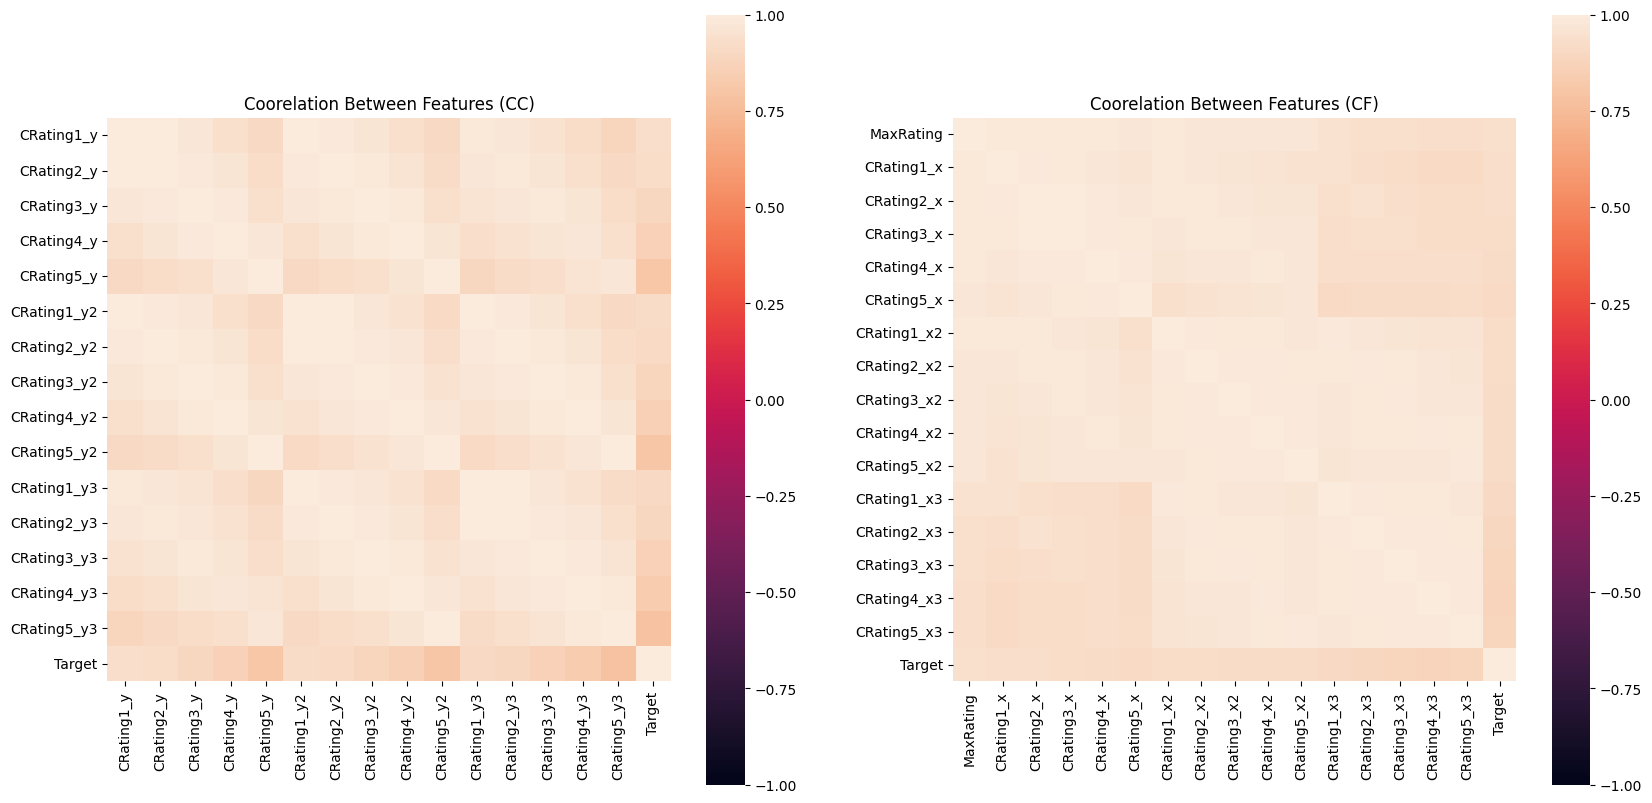

In [ ]:
import seaborn as sb
fig=plt.figure(figsize=(20, 10), dpi=100)
plt.subplot(1, 2, 1)
_=fCC.copy()
_['Target']=lCC['CurrentRating']
C_mat=_.corr()
sb.heatmap(C_mat, vmin=-1 ,vmax=1, square=True)
plt.title("Coorelation Between Features (CC)")
plt.subplot(1, 2, 2)
_=fCF.copy()
_['Target']=lCF['CRating1_y']
C_mat=_.corr()
sb.heatmap(C_mat, vmin=-1 ,vmax=1, square=True)
plt.title("Coorelation Between Features (CF)")
plt.show()

### Standardization of Data

In [ ]:
from sklearn import preprocessing

fCC_scaled=preprocessing.StandardScaler().fit_transform(fCC)
fCF_scaled=preprocessing.StandardScaler().fit_transform(fCF)

*Using 70:30 Train-Test Split*

In [ ]:
from sklearn.model_selection import train_test_split

train_CCx, test_CCx, train_CCy, test_CCy=train_test_split(fCC_scaled,lCC, test_size=0.3)
train_CFx, test_CFx, train_CFy, test_CFy=train_test_split(fCF_scaled,lCF, test_size=0.3)

# Now Lets Train Some Model

# A. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

modelLinearRegCC=LinearRegression()
modelLinearRegCC.fit(train_CCx, train_CCy)
predLinear_CC=modelLinearRegCC.predict(test_CCx)

modelLinearRegCF=LinearRegression()
modelLinearRegCF.fit(train_CFx, train_CFy)
predLinear_CF=modelLinearRegCF.predict(test_CFx)

## Visualisation of Results

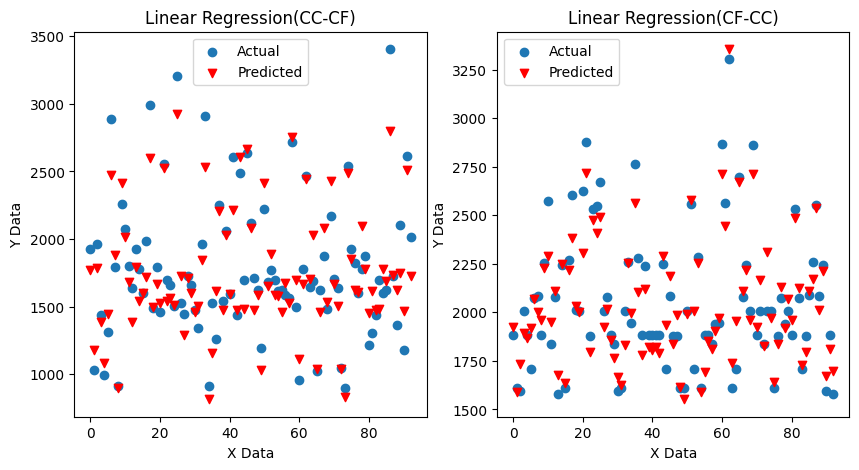

In [ ]:
indexer=np.arange(test_CCx.shape[0])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(indexer, test_CCy, label="Actual")
plt.scatter(indexer, predLinear_CC, label="Predicted", marker='v', c='r')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Linear Regression(CC-CF)")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(indexer, test_CFy, label="Actual")
plt.scatter(indexer, predLinear_CF, label="Predicted", marker='v', c='r')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Linear Regression(CF-CC)")
plt.legend()
plt.show()

### Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression

print("Evaluation for Model CC-CF")
print("Mean Squared Error:", mean_squared_error(test_CCy, predLinear_CC))
print("Root Mean Square Error:", mean_squared_error(test_CCy, predLinear_CC)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CCy, predLinear_CC))
print("R2 Score:", r2_score(test_CCy, predLinear_CC))
print("Explained Variance Score:", explained_variance_score(test_CCy, predLinear_CC))
print("Mean Absolute Percentage Error:", np.mean(np.abs((test_CCy - predLinear_CC) / test_CCy))['CurrentRating'] * 100)
print("Mean Percentage Error:", np.mean((test_CCy - predLinear_CC) / test_CCy)['CurrentRating'] * 100)
f_statistic, p_values = f_regression(train_CCx, np.ravel(train_CCy))
print("F-statistic:", f_statistic)
print("P-values:", p_values)
print('*'*100)
print("Evaluation for Model CF-CC")
print("Mean Squared Error:", mean_squared_error(test_CFy, predLinear_CF))
print("Root Mean Square Error:", mean_squared_error(test_CFy, predLinear_CF)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CFy, predLinear_CF))
print("R2 Score:", r2_score(test_CFy, predLinear_CF))
print("Explained Variance Score:", explained_variance_score(test_CFy, predLinear_CF))
print("Mean Absolute Percentage Error:", np.mean(np.abs((test_CFy - predLinear_CF) / test_CFy))['CRating1_y'] * 100)
print("Mean Percentage Error:", np.mean((test_CFy - predLinear_CF) / test_CFy)['CRating1_y'] * 100)
f_statistic, p_values = f_regression(train_CFx, np.ravel(train_CFy))
print("F-statistic:", f_statistic)
print("P-values:", p_values)

Evaluation for Model CC-CF
Mean Squared Error: 34623.53430620096
Root Mean Square Error: 186.07400223083548
Mean Absolute Error: 142.6536043907995
R2 Score: 0.8670068282910157
Explained Variance Score: 0.8716794183978084
Mean Absolute Percentage Error: 8.167224173509831
Mean Percentage Error: 0.8894301932485008
F-statistic: [1357.03597063 1241.45181431  893.26960584  614.25073519  407.97259482
 1166.11912656 1057.26043515  782.61768738  566.47252587  392.34873394
  917.62946748  824.22489883  631.33702199  483.8072854   352.2072394 ]
P-values: [7.66042421e-95 2.83370405e-91 1.65698417e-78 5.99918310e-65
 1.43816773e-51 8.58773537e-89 5.89140561e-85 1.36730161e-73
 3.57467938e-62 2.22097795e-50 1.59642418e-79 1.68223146e-75
 6.67426505e-66 6.06575377e-57 3.52670349e-47]
****************************************************************************************************
Evaluation for Model CF-CC
Mean Squared Error: 12506.955136107606
Root Mean Square Error: 111.83449886375674
Mean Absol

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/

*Plotting the Learning Curve*

# B. Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import validation_curve

modelRidgeCV_CC=RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10])
modelRidgeCV_CC.fit(train_CCx, train_CCy)
pred_CCRidge=modelRidgeCV_CC.predict(test_CCx)
print("Optimum Alpha CC-CF", modelRidgeCV_CC.alpha_)


modelRidgeCV_CF=RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10])
modelRidgeCV_CF.fit(train_CFx, train_CFy)
pred_CFRidge=modelRidgeCV_CF.predict(test_CFx)
print("Optimum Alpha CF-CC", modelRidgeCV_CF.alpha_)

Optimum Alpha CC-CF 1.0
Optimum Alpha CF-CC 1.0


## Visualising the Results

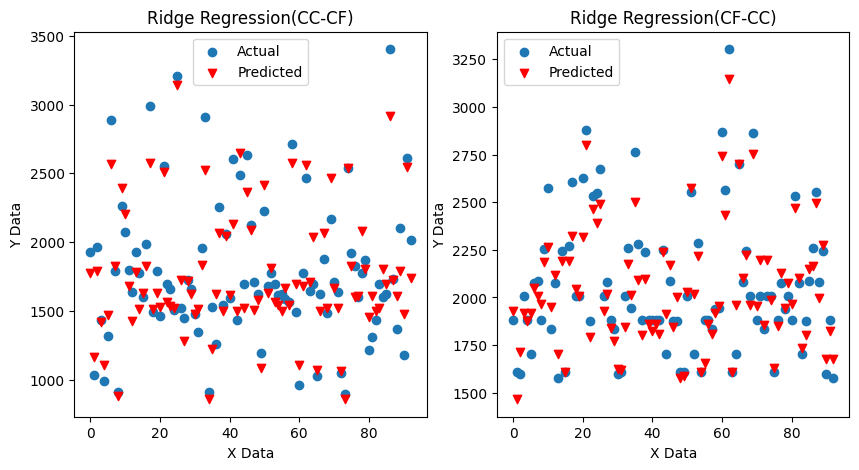

In [ ]:
indexer=np.arange(test_CCx.shape[0])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(indexer, test_CCy, label="Actual")
plt.scatter(indexer, pred_CCRidge, label="Predicted", marker='v', c='r')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Ridge Regression(CC-CF)")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(indexer, test_CFy, label="Actual")
plt.scatter(indexer, pred_CFRidge, label="Predicted", marker='v', c='r')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Ridge Regression(CF-CC)")
plt.legend()
plt.show()

### Plotting the Validation Curve for Different Alphas

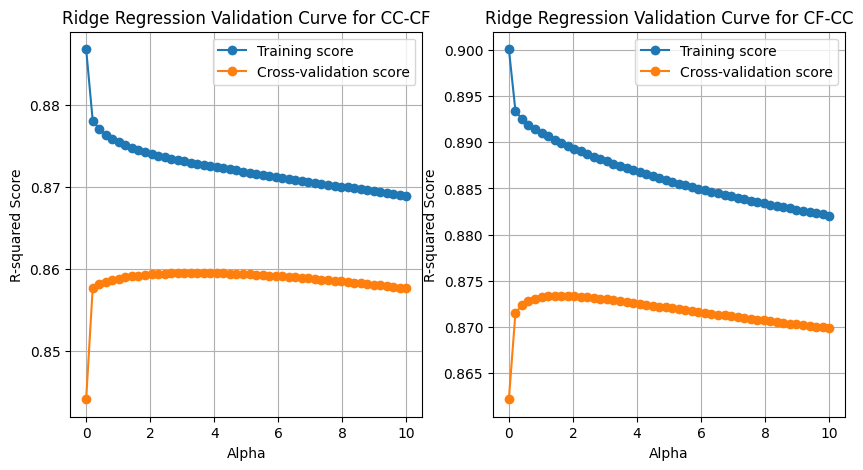

In [ ]:
modelRidge=Ridge()
alphas=np.linspace(0, 10, 50)
train_scores, test_scores = validation_curve(modelRidge, train_CCx, train_CCy, param_name="alpha", param_range=alphas, scoring="r2", cv=5)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(alphas, np.mean(train_scores, axis=1), label="Training score", marker='o')
plt.plot(alphas, np.mean(test_scores, axis=1), label="Cross-validation score", marker='o')
plt.title("Ridge Regression Validation Curve for CC-CF")
plt.xlabel("Alpha")
plt.ylabel("R-squared Score")
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
train_scores, test_scores = validation_curve(modelRidge, train_CFx, train_CFy, param_name="alpha", param_range=alphas, scoring="r2", cv=5)
plt.plot(alphas, np.mean(train_scores, axis=1), label="Training score", marker='o')
plt.plot(alphas, np.mean(test_scores, axis=1), label="Cross-validation score", marker='o')
plt.title("Ridge Regression Validation Curve for CF-CC")
plt.xlabel("Alpha")
plt.ylabel("R-squared Score")
plt.legend()
plt.grid(True)

### RidgeCV Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression

print("Evaluation for Model CC-CF")
print("Mean Squared Error:", mean_squared_error(test_CCy, pred_CCRidge))
print("Root Mean Square Error:", mean_squared_error(test_CCy, pred_CCRidge)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CCy, pred_CCRidge))
print("R2 Score:", r2_score(test_CCy, pred_CCRidge))
print("Explained Variance Score:", explained_variance_score(test_CCy, pred_CCRidge))
print("Mean Absolute Percentage Error:", np.mean(np.abs((test_CCy - pred_CCRidge) / test_CCy)) * 100)
print("Mean Percentage Error:", np.mean((test_CCy - pred_CCRidge) / test_CCy) * 100)
print('*'*100)
print("Evaluation for Model CF-CC")
print("Mean Squared Error:", mean_squared_error(test_CFy, pred_CFRidge))
print("Root Mean Square Error:", mean_squared_error(test_CFy, pred_CFRidge)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CFy, pred_CFRidge))
print("R2 Score:", r2_score(test_CFy, pred_CFRidge))
print("Explained Variance Score:", explained_variance_score(test_CFy, pred_CFRidge))
print("Mean Absolute Percentage Error:", np.mean(np.abs((test_CFy - pred_CFRidge) / test_CFy)) * 100)
print("Mean Percentage Error:", np.mean((test_CFy - pred_CFRidge) / test_CFy) * 100)

Evaluation for Model CC-CF
Mean Squared Error: 32604.748283799596
Root Mean Square Error: 180.5678495297532
Mean Absolute Error: 141.13754163058945
R2 Score: 0.874761228917668
Explained Variance Score: 0.8776062626949381
Mean Absolute Percentage Error: CurrentRating    8.054331
dtype: float64
Mean Percentage Error: CurrentRating    0.38863
dtype: float64
****************************************************************************************************
Evaluation for Model CF-CC
Mean Squared Error: 12880.83090152386
Root Mean Square Error: 113.49374829268729
Mean Absolute Error: 84.53283847866797
R2 Score: 0.8983175988415143
Explained Variance Score: 0.9016467069355666
Mean Absolute Percentage Error: CRating1_y    4.084463
dtype: float64
Mean Percentage Error: CRating1_y    0.543056
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/

# C. Lasso Regression

In [ ]:
from sklearn.linear_model import LassoCV, Lasso
alphas=[1e-1, 1, 10, 100, 1000, 10000]
modelLassoCC=LassoCV(alphas=alphas, max_iter=100000)
modelLassoCC.fit(train_CCx, np.ravel(train_CCy))
modelLassoCF=LassoCV(alphas=alphas, max_iter=100000)
modelLassoCF.fit(train_CFx, np.ravel(train_CFy))

print("Optimum Alpha", modelLassoCC.alpha_)
print("Optimum Alpha", modelLassoCF.alpha_)

predLassoCC=modelLassoCC.predict(test_CCx)
predLassoCF=modelLassoCF.predict(test_CFx)

Optimum Alpha 1.0
Optimum Alpha 10.0


## Visualisation of Results

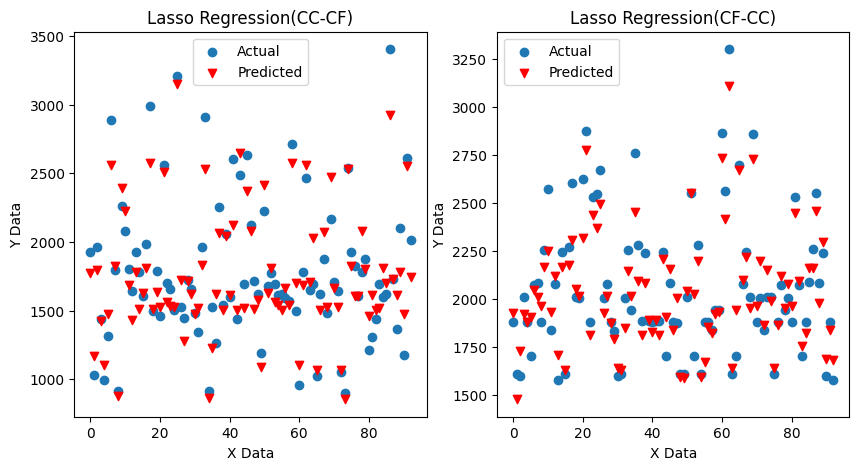

In [ ]:
indexer=np.arange(test_CCx.shape[0])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(indexer, test_CCy, label="Actual")
plt.scatter(indexer, predLassoCC, label="Predicted", marker='v', c='r')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Lasso Regression(CC-CF)")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(indexer, test_CFy, label="Actual")
plt.scatter(indexer, predLassoCF, label="Predicted", marker='v', c='r')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Lasso Regression(CF-CC)")
plt.legend()
plt.show()

### Plotting the validation curve for various alphas

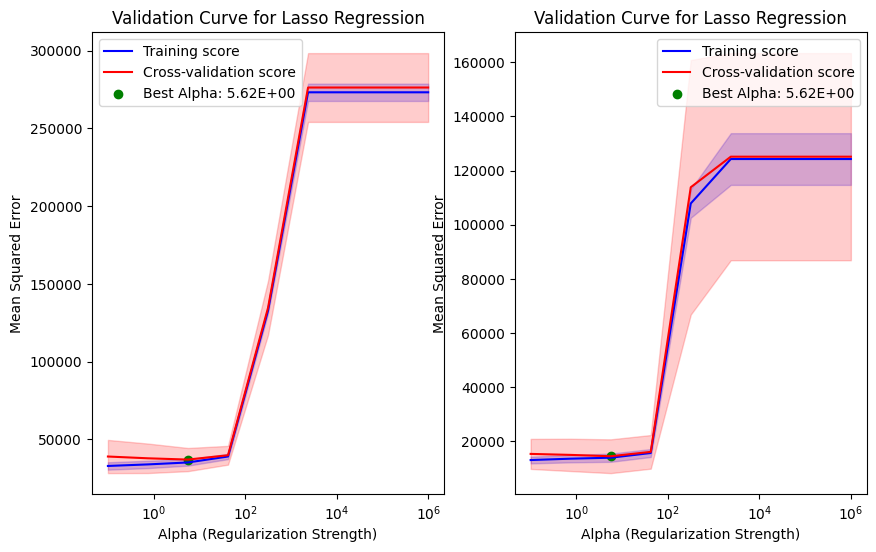

In [ ]:
modelLasso=Lasso(max_iter=100000)

alphas = np.logspace(-1, 6, 9)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
train_scores, valid_scores = validation_curve(modelLasso, train_CCx, train_CCy, param_name="alpha", param_range=alphas, scoring="neg_mean_squared_error", cv=5)
# Calculate mean and standard deviation for training and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
best_alpha_index = np.argmin(valid_scores_mean)
# Plot the validation curve
plt.semilogx(alphas, train_scores_mean, label="Training score", color="blue")
plt.fill_between(alphas, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.semilogx(alphas, valid_scores_mean, label="Cross-validation score", color="red")
plt.fill_between(alphas, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.2, color="red")
plt.scatter(alphas[best_alpha_index], valid_scores_mean[best_alpha_index], color='green', marker='o', label=f'Best Alpha: {alphas[best_alpha_index]:.2E}')
plt.title("Validation Curve for Lasso Regression")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")

plt.subplot(1, 2, 2)
train_scores, valid_scores = validation_curve(modelLasso, train_CFx, train_CFy, param_name="alpha", param_range=alphas, scoring="neg_mean_squared_error", cv=5)
# Calculate mean and standard deviation for training and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
best_alpha_index = np.argmin(valid_scores_mean)
# Plot the validation curve
plt.semilogx(alphas, train_scores_mean, label="Training score", color="blue")
plt.fill_between(alphas, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.semilogx(alphas, valid_scores_mean, label="Cross-validation score", color="red")
plt.fill_between(alphas, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.2, color="red")
plt.scatter(alphas[best_alpha_index], valid_scores_mean[best_alpha_index], color='green', marker='o', label=f'Best Alpha: {alphas[best_alpha_index]:.2E}')
plt.title("Validation Curve for Lasso Regression")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.show()

### LassoCV Model Evaluation

In [ ]:
print("For Codechef to Codeforces Model")
print("Mean Squared Error:", mean_squared_error(test_CCy, predLassoCC))
print("Root Mean Square Error:", mean_squared_error(test_CCy, predLassoCC)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CCy, predLassoCC))
print("R2 Score:", r2_score(test_CCy, predLassoCC))
print("Explained Variance Score:", explained_variance_score(test_CCy, predLassoCC))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CCy) - predLassoCC) / np.ravel(test_CCy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CCy) - predLassoCC) / np.ravel(test_CCy)) * 100)
print('*'*100)
print("Evaluation for Model CF-CC")
print("Mean Squared Error:", mean_squared_error(test_CFy, predLassoCF))
print("Root Mean Square Error:", mean_squared_error(test_CFy, predLassoCF)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CFy, predLassoCF))
print("R2 Score:", r2_score(test_CFy, predLassoCF))
print("Explained Variance Score:", explained_variance_score(test_CFy, predLassoCF))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CFy) - predLassoCF) / np.ravel(test_CFy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CFy) - predLassoCF) / np.ravel(test_CFy)) * 100)

For Codechef to Codeforces Model
Mean Squared Error: 32715.394192095035
Root Mean Square Error: 180.87397323024402
Mean Absolute Error: 141.6505992944178
R2 Score: 0.8743362246373223
Explained Variance Score: 0.8771278472121687
Mean Absolute Percentage Error: 8.08265081854281
Mean Percentage Error: 0.37513091790428627
****************************************************************************************************
Evaluation for Model CF-CC
Mean Squared Error: 13742.108836180425
Root Mean Square Error: 117.22674113094003
Mean Absolute Error: 88.44553354393362
R2 Score: 0.8915185958012415
Explained Variance Score: 0.8952664763176721
Mean Absolute Percentage Error: 4.239652518628182
Mean Percentage Error: 0.5256443692360802


# D. ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

alphas = np.logspace(-4, 2, 7)

modelElasticCC=ElasticNetCV(alphas=alphas, max_iter=1000000).fit(train_CCx, np.ravel(train_CCy))
modelElasticCF=ElasticNetCV(alphas=alphas, max_iter=1000000).fit(train_CFx, np.ravel(train_CFy))

print("Optimum Alpha", modelElasticCC.alpha_)
print("Optimum Alpha", modelElasticCF.alpha_)

predElasticCC=modelElasticCC.predict(test_CCx)
predElasticCF=modelElasticCF.predict(test_CFx)

Optimum Alpha 0.1
Optimum Alpha 0.01


## Visualisation of Results

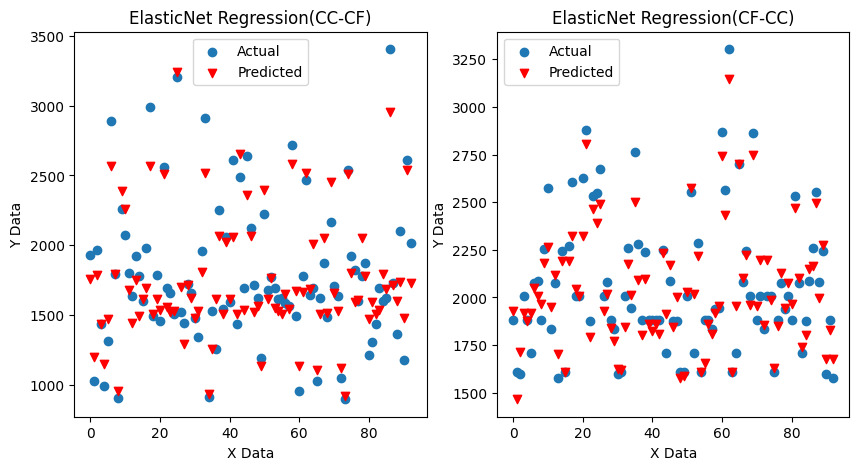

In [ ]:
indexer=np.arange(test_CCx.shape[0])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(indexer, test_CCy, label="Actual")
plt.scatter(indexer, predElasticCC, label="Predicted", marker='v', c='r')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("ElasticNet Regression(CC-CF)")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(indexer, test_CFy, label="Actual")
plt.scatter(indexer, predElasticCF, label="Predicted", marker='v', c='r')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("ElasticNet Regression(CF-CC)")
plt.legend()
plt.show()

### Validation Curve for ElasticNet Regression

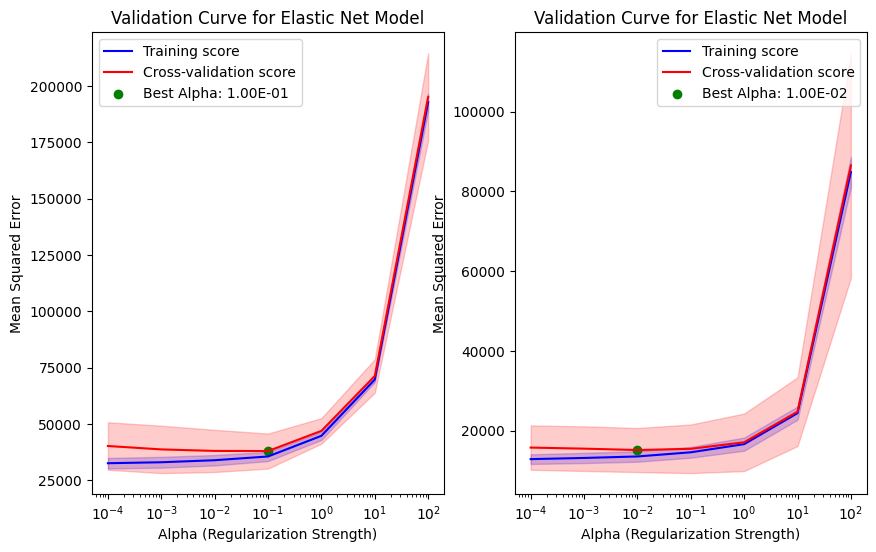

In [ ]:
elastic_net_model=ElasticNet(max_iter=1000000)
alphas = np.logspace(-4, 2, 7)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
train_scores, valid_scores = validation_curve(elastic_net_model, train_CCx, train_CCy, param_name="alpha", param_range=alphas, scoring="neg_mean_squared_error", cv=5)
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
best_alpha_index = np.argmin(valid_scores_mean)
plt.semilogx(alphas, train_scores_mean, label="Training score", color="blue")
plt.fill_between(alphas, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.semilogx(alphas, valid_scores_mean, label="Cross-validation score", color="red")
plt.fill_between(alphas, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.2, color="red")
plt.scatter(alphas[best_alpha_index], valid_scores_mean[best_alpha_index], color='green', marker='o', label=f'Best Alpha: {alphas[best_alpha_index]:.2E}')
plt.title("Validation Curve for Elastic Net Model")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")

plt.subplot(1, 2, 2)
train_scores, valid_scores = validation_curve(elastic_net_model, train_CFx, train_CFy, param_name="alpha", param_range=alphas, scoring="neg_mean_squared_error", cv=5)
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
best_alpha_index = np.argmin(valid_scores_mean)
plt.semilogx(alphas, train_scores_mean, label="Training score", color="blue")
plt.fill_between(alphas, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.semilogx(alphas, valid_scores_mean, label="Cross-validation score", color="red")
plt.fill_between(alphas, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.2, color="red")
plt.scatter(alphas[best_alpha_index], valid_scores_mean[best_alpha_index], color='green', marker='o', label=f'Best Alpha: {alphas[best_alpha_index]:.2E}')
plt.title("Validation Curve for Elastic Net Model")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.show()

### Evaluation for ElasticNetCV

In [ ]:
print("For Codechef to Codeforces Model")
print("Mean Squared Error:", mean_squared_error(test_CCy, predElasticCC))
print("Root Mean Square Error:", mean_squared_error(test_CCy, predElasticCC)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CCy, predElasticCC))
print("R2 Score:", r2_score(test_CCy, predElasticCC))
print("Explained Variance Score:", explained_variance_score(test_CCy, predElasticCC))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CCy) - predElasticCC) / np.ravel(test_CCy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CCy) - predElasticCC) / np.ravel(test_CCy)) * 100)
print('*'*100)
print("Evaluation for Model CF-CC")
print("Mean Squared Error:", mean_squared_error(test_CFy, predElasticCF))
print("Root Mean Square Error:", mean_squared_error(test_CFy, predElasticCF)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CFy, predElasticCF))
print("R2 Score:", r2_score(test_CFy, predElasticCF))
print("Explained Variance Score:", explained_variance_score(test_CFy, predElasticCF))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CFy) - predElasticCF) / np.ravel(test_CFy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CFy) - predElasticCF) / np.ravel(test_CFy)) * 100)

For Codechef to Codeforces Model
Mean Squared Error: 33870.42425843764
Root Mean Square Error: 184.03919218046366
Mean Absolute Error: 143.86548530436252
R2 Score: 0.8698996148278313
Explained Variance Score: 0.8729917848256039
Mean Absolute Percentage Error: 8.226066089884918
Mean Percentage Error: 0.19569864653777447
****************************************************************************************************
Evaluation for Model CF-CC
Mean Squared Error: 12892.817860154746
Root Mean Square Error: 113.5465449062839
Mean Absolute Error: 84.50146200360908
R2 Score: 0.8982229727459236
Explained Variance Score: 0.9015378983497316
Mean Absolute Percentage Error: 4.08265969597695
Mean Percentage Error: 0.5407392744789021


# E. Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

treeRegressorCC=DecisionTreeRegressor(max_depth=15)
treeRegressorCF=DecisionTreeRegressor(max_depth=29)

treeRegressorCC.fit(train_CCx, np.ravel(train_CCy))
treeRegressorCF.fit(train_CFx, np.ravel(train_CFy))

predDtreeCC=treeRegressorCC.predict(test_CCx)
predDtreeCF=treeRegressorCF.predict(test_CFx)

### Visualising the Result

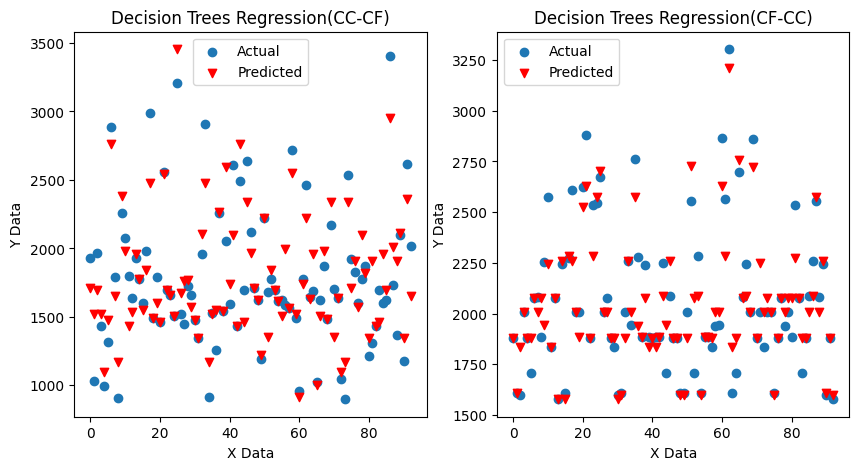

In [ ]:
indexer=np.arange(test_CCx.shape[0])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(indexer, test_CCy, label="Actual")
plt.scatter(indexer, predDtreeCC, label="Predicted", marker='v', c='r')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Decision Trees Regression(CC-CF)")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(indexer, test_CFy, label="Actual")
plt.scatter(indexer, predDtreeCF, label="Predicted", marker='v', c='r')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Decision Trees Regression(CF-CC)")
plt.legend()
plt.show()

## Validation Curve for Decision Tree Regressor for different *max_depth* values

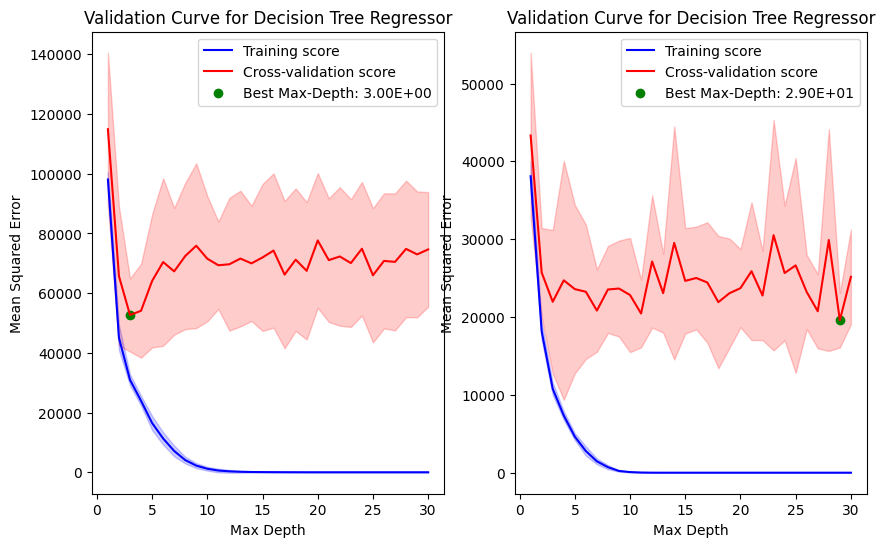

In [ ]:
max_depth_values = np.arange(1, 31)
regressor = DecisionTreeRegressor()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
train_scores, test_scores = validation_curve(regressor,train_CCx, train_CCy, param_name="max_depth", param_range=max_depth_values, scoring="neg_mean_squared_error", cv=5)
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
best_max_depth_index=np.argmin(test_scores_mean)
plt.plot(max_depth_values, train_scores_mean, label="Training score", color="blue")
plt.fill_between(max_depth_values, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(max_depth_values, test_scores_mean, label="Cross-validation score", color="red")
plt.fill_between(max_depth_values, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="red")
plt.scatter(max_depth_values[best_max_depth_index], test_scores_mean[best_max_depth_index], color='green', marker='o', label=f'Best Max-Depth: {max_depth_values[best_max_depth_index]:.2E}')
plt.title("Validation Curve for Decision Tree Regressor")
plt.xlabel("Max Depth")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.subplot(1, 2, 2)
train_scores, test_scores = validation_curve(regressor,train_CFx, train_CFy, param_name="max_depth", param_range=max_depth_values, scoring="neg_mean_squared_error", cv=5)
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
best_max_depth_index=np.argmin(test_scores_mean)
plt.plot(max_depth_values, train_scores_mean, label="Training score", color="blue")
plt.fill_between(max_depth_values, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(max_depth_values, test_scores_mean, label="Cross-validation score", color="red")
plt.fill_between(max_depth_values, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="red")
plt.scatter(max_depth_values[best_max_depth_index], test_scores_mean[best_max_depth_index], color='green', marker='o', label=f'Best Max-Depth: {max_depth_values[best_max_depth_index]:.2E}')
plt.title("Validation Curve for Decision Tree Regressor")
plt.xlabel("Max Depth")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.show()

## Evaluation for Decision Tree Regression

In [ ]:
print("Evaluation for Model CC-CF")
print("Mean Squared Error:", mean_squared_error(test_CCy, predDtreeCC))
print("Root Mean Square Error:", mean_squared_error(test_CCy, predDtreeCC)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CCy, predDtreeCC))
print("R2 Score:", r2_score(test_CCy, predDtreeCC))
print("Explained Variance Score:", explained_variance_score(test_CCy, predDtreeCC))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CCy) - predDtreeCC) / np.ravel(test_CCy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CCy) - predDtreeCC) / np.ravel(test_CCy)) * 100)
print('*'*100)
print("Evaluation for Model CF-CC")
print("Mean Squared Error:", mean_squared_error(test_CFy, predDtreeCF))
print("Root Mean Square Error:", mean_squared_error(test_CFy, predDtreeCF)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CFy, predDtreeCF))
print("R2 Score:", r2_score(test_CFy, predDtreeCF))
print("Explained Variance Score:", explained_variance_score(test_CFy, predDtreeCF))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CFy) - predDtreeCF) / np.ravel(test_CFy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CFy) - predDtreeCF) / np.ravel(test_CFy)) * 100)

Evaluation for Model CC-CF
Mean Squared Error: 49875.89247311828
Root Mean Square Error: 223.32911246212007
Mean Absolute Error: 159.72043010752688
R2 Score: 0.8084206807671775
Explained Variance Score: 0.8085238585343084
Mean Absolute Percentage Error: 9.402531977853227
Mean Percentage Error: -2.1309071868907203
****************************************************************************************************
Evaluation for Model CF-CC
Mean Squared Error: 18599.913978494624
Root Mean Square Error: 136.3815015993541
Mean Absolute Error: 89.72043010752688
R2 Score: 0.8531706588547119
Explained Variance Score: 0.8550214439604196
Mean Absolute Percentage Error: 4.221188317965686
Mean Percentage Error: 0.18886019980300264


# F. Random Forest

In [ ]:
from sklearn.ensemble  import RandomForestRegressor

modelRForestCC=RandomForestRegressor(n_estimators=120).fit(train_CCx, np.ravel(train_CCy))
modelRForestCF=RandomForestRegressor(n_estimators=90).fit(train_CFx, np.ravel(train_CFy))

predRForestCC=modelRForestCC.predict(test_CCx)
predRForestCF=modelRForestCF.predict(test_CFx)

### Plotting the Results

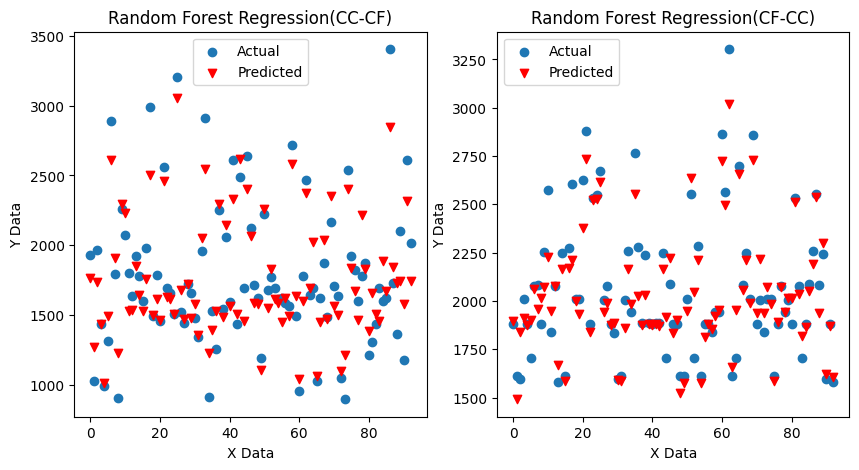

In [ ]:
indexer=np.arange(test_CCx.shape[0])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(indexer, test_CCy, label="Actual")
plt.scatter(indexer, predRForestCC, label="Predicted", marker='v', c='r')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Random Forest Regression(CC-CF)")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(indexer, test_CFy, label="Actual")
plt.scatter(indexer, predRForestCF, label="Predicted", marker='v', c='r')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Random Forest Regression(CF-CC)")
plt.legend()
plt.show()

## Plotting the Validation Curve for Different Values of *N_Estimators*

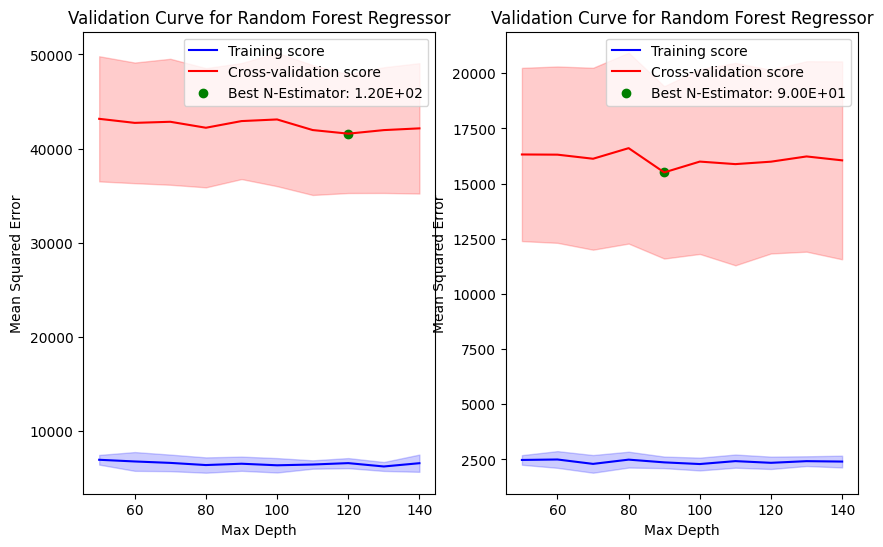

In [ ]:
estimators = np.arange(50, 150, 10)
regressorRF = RandomForestRegressor()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
train_scores, test_scores = validation_curve(regressorRF,train_CCx, np.ravel(train_CCy), param_name="n_estimators", param_range=estimators, scoring="neg_mean_squared_error", cv=4)
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
best_estimator_index=np.argmin(test_scores_mean)
plt.plot(estimators, train_scores_mean, label="Training score", color="blue")
plt.fill_between(estimators, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(estimators, test_scores_mean, label="Cross-validation score", color="red")
plt.fill_between(estimators, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="red")
plt.scatter(estimators[best_estimator_index], test_scores_mean[best_estimator_index], color='green', marker='o', label=f'Best N-Estimator: {estimators[best_estimator_index]:.2E}')
plt.title("Validation Curve for Random Forest Regressor")
plt.xlabel("Max Depth")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.subplot(1, 2, 2)
train_scores, test_scores = validation_curve(regressorRF,train_CFx, np.ravel(train_CFy), param_name="n_estimators", param_range=estimators, scoring="neg_mean_squared_error", cv=4)
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
best_estimator_index=np.argmin(test_scores_mean)
plt.plot(estimators, train_scores_mean, label="Training score", color="blue")
plt.fill_between(estimators, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(estimators, test_scores_mean, label="Cross-validation score", color="red")
plt.fill_between(estimators, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="red")
plt.scatter(estimators[best_estimator_index], test_scores_mean[best_estimator_index], color='green', marker='o', label=f'Best N-Estimator: {estimators[best_estimator_index]:.2E}')
plt.title("Validation Curve for Random Forest Regressor")
plt.xlabel("Max Depth")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.show()

### Evaluation of Random Forest Regressor

In [ ]:
print("Evaluation for Model CC-CF")
print("Mean Squared Error:", mean_squared_error(test_CCy, predRForestCC))
print("Root Mean Square Error:", mean_squared_error(test_CCy, predRForestCC)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CCy, predRForestCC))
print("R2 Score:", r2_score(test_CCy, predRForestCC))
print("Explained Variance Score:", explained_variance_score(test_CCy, predRForestCC))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CCy) - predRForestCC) / np.ravel(test_CCy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CCy) - predRForestCC) / np.ravel(test_CCy)) * 100)
print('*'*100)
print("Evaluation for Model CF-CC")
print("Mean Squared Error:", mean_squared_error(test_CFy, predRForestCF))
print("Root Mean Square Error:", mean_squared_error(test_CFy, predRForestCF)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CFy, predRForestCF))
print("R2 Score:", r2_score(test_CFy, predRForestCF))
print("Explained Variance Score:", explained_variance_score(test_CFy, predRForestCF))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CFy) - predRForestCF) / np.ravel(test_CFy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CFy) - predRForestCF) / np.ravel(test_CFy)) * 100)

Evaluation for Model CC-CF
Mean Squared Error: 37356.051063321385
Root Mean Square Error: 193.2771353867844
Mean Absolute Error: 152.1838709677419
R2 Score: 0.8565109018190522
Explained Variance Score: 0.8580013582351009
Mean Absolute Percentage Error: 9.085276071701157
Mean Percentage Error: -0.7712808285979533
****************************************************************************************************
Evaluation for Model CF-CC
Mean Squared Error: 14302.868676490109
Root Mean Square Error: 119.59460136849869
Mean Absolute Error: 82.83201911589008
R2 Score: 0.8870919087752367
Explained Variance Score: 0.8910896061630715
Mean Absolute Percentage Error: 3.974454280528249
Mean Percentage Error: 0.6107338611832271


# G. Gradient Boosting XG Boost

In [ ]:
from xgboost import XGBRegressor

modelXGBCC=XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 2, alpha =1000, n_estimators = 100, random_state=42)
modelXGBCF=XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 100, n_estimators = 100, random_state=42)

modelXGBCC.fit(train_CCx, train_CCy)
modelXGBCF.fit(train_CFx, train_CFy)

predXGBCC=modelXGBCC.predict(test_CCx)
predXGBCF=modelXGBCF.predict(test_CFx)

## Plotting the Results

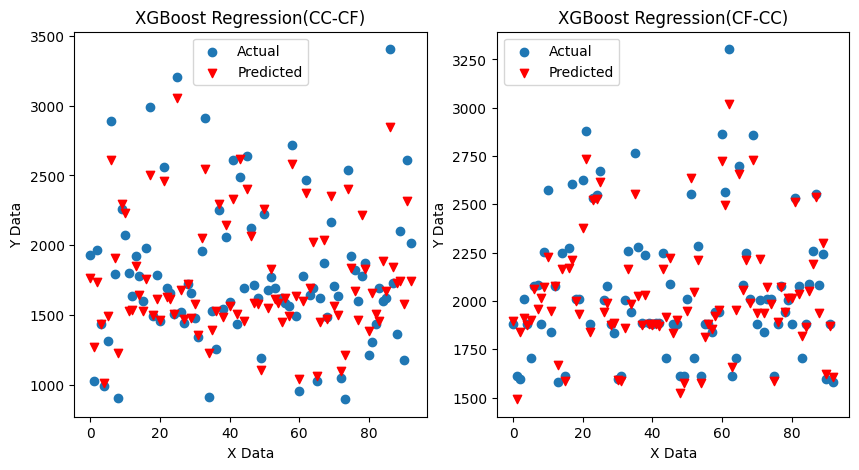

In [ ]:
indexer=np.arange(test_CCx.shape[0])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(indexer, test_CCy, label="Actual")
plt.scatter(indexer, predRForestCC, label="Predicted", marker='v', c='r')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("XGBoost Regression(CC-CF)")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(indexer, test_CFy, label="Actual")
plt.scatter(indexer, predRForestCF, label="Predicted", marker='v', c='r')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("XGBoost Regression(CF-CC)")
plt.legend()
plt.show()

### Using Grid Search for search of best hyper parameters
*Warning: Running this block can take several minutes*

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_model=XGBRegressor(random_state=42)
params={
    'max_depth':np.arange(1, 15),
    'learning_rate':[1e-1, 1],
    'alpha':[1e-1, 1, 10, 100, 1000]
}

grid_search=GridSearchCV(estimator=xgb_model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(train_CCx, train_CCy)
best_modelCC = grid_search.best_estimator_
print("Hyperparameters of the Best Model CC:")
bp=best_modelCC.get_params()
print('max_depth: ', bp['max_depth'])
print('learning_rate:', bp['learning_rate'])
print('alpha: ', bp['alpha'])

grid_search=GridSearchCV(estimator=xgb_model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(train_CFx, train_CFy)
best_modelCF = grid_search.best_estimator_
print("\nHyperparameters of the Best Model CF:")
bp=best_modelCF.get_params()
print('max_depth: ', bp['max_depth'])
print('learning_rate: ', bp['learning_rate'])
print('alpha: ', bp['alpha'])

Hyperparameters of the Best Model CC:
max_depth:  2
learning_rate: 0.1
alpha:  1000

Hyperparameters of the Best Model CF:
max_depth:  5
learning_rate:  0.1
alpha:  100


## Evaluation for XG-Boost Regressor Model

In [ ]:
print("Evaluation for Model CC-CF")
print("Mean Squared Error:", mean_squared_error(test_CCy, predXGBCC))
print("Root Mean Square Error:", mean_squared_error(test_CCy, predXGBCC)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CCy, predXGBCC))
print("R2 Score:", r2_score(test_CCy, predXGBCC))
print("Explained Variance Score:", explained_variance_score(test_CCy, predXGBCC))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CCy) - predXGBCC) / np.ravel(test_CCy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CCy) - predXGBCC) / np.ravel(test_CCy)) * 100)
print('*'*100)
print("Evaluation for Model CF-CC")
print("Mean Squared Error:", mean_squared_error(test_CFy, predXGBCF))
print("Root Mean Square Error:", mean_squared_error(test_CFy, predXGBCF)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CFy, predXGBCF))
print("R2 Score:", r2_score(test_CFy, predXGBCF))
print("Explained Variance Score:", explained_variance_score(test_CFy, predXGBCF))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CFy) - predXGBCF) / np.ravel(test_CFy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CFy) - predXGBCF) / np.ravel(test_CFy)) * 100)

Evaluation for Model CC-CF
Mean Squared Error: 39283.836432925316
Root Mean Square Error: 198.20150461821757
Mean Absolute Error: 156.1215597173219
R2 Score: 0.849106045676683
Explained Variance Score: 0.8526807992773611
Mean Absolute Percentage Error: 9.140610675936397
Mean Percentage Error: -0.023163241091693803
****************************************************************************************************
Evaluation for Model CF-CC
Mean Squared Error: 14079.001102861857
Root Mean Square Error: 118.65496661691772
Mean Absolute Error: 81.47718466481855
R2 Score: 0.8888591389020876
Explained Variance Score: 0.8911367824805634
Mean Absolute Percentage Error: 3.899679276102746
Mean Percentage Error: 0.376436529723614


# H. lightGBM

In [ ]:
import lightgbm as lgb

params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'random_state': 42
}

modelGBMCC=lgb.train(params, lgb.Dataset(train_CCx, train_CCy), 100, valid_sets=[lgb.Dataset(test_CCx, test_CCy)], callbacks=[lgb.early_stopping(10)])
predGBMCC=modelGBMCC.predict(test_CCx, num_iteration=modelGBMCC.best_iteration)

modelGBMCF=lgb.train(params, lgb.Dataset(train_CFx, train_CFy), 100, valid_sets=[lgb.Dataset(test_CFx, test_CFy)], callbacks=[lgb.early_stopping(10)])
predGBMCF=modelGBMCF.predict(test_CFx, num_iteration=modelGBMCF.best_iteration)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

## Visualising Output of the Model

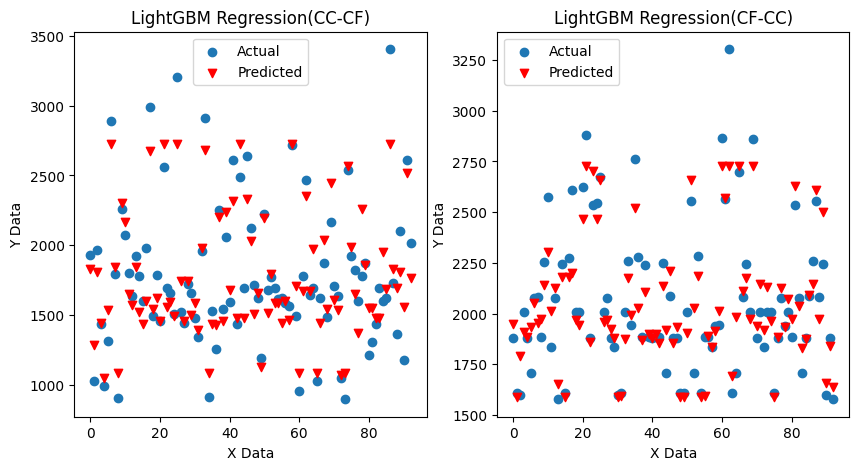

In [ ]:
indexer=np.arange(test_CCx.shape[0])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(indexer, test_CCy, label="Actual")
plt.scatter(indexer, predGBMCC, label="Predicted", marker='v', c='r')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("LightGBM Regression(CC-CF)")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(indexer, test_CFy, label="Actual")
plt.scatter(indexer, predGBMCF, label="Predicted", marker='v', c='r')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("LightGBM Regression(CF-CC)")
plt.legend()
plt.show()

### Evaluation of the Model

In [ ]:
print("Evaluation for Model CC-CF")
print("Mean Squared Error:", mean_squared_error(test_CCy, predGBMCC))
print("Root Mean Square Error:", mean_squared_error(test_CCy, predGBMCC)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CCy, predGBMCC))
print("R2 Score:", r2_score(test_CCy, predGBMCC))
print("Explained Variance Score:", explained_variance_score(test_CCy, predGBMCC))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CCy) - predGBMCC) / np.ravel(test_CCy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CCy) - predGBMCC) / np.ravel(test_CCy)) * 100)
print('*'*100)
print("Evaluation for Model CF-CC")
print("Mean Squared Error:", mean_squared_error(test_CFy, predGBMCF))
print("Root Mean Square Error:", mean_squared_error(test_CFy, predGBMCF)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CFy, predGBMCF))
print("R2 Score:", r2_score(test_CFy, predGBMCF))
print("Explained Variance Score:", explained_variance_score(test_CFy, predGBMCF))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CFy) - predGBMCF) / np.ravel(test_CFy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CFy) - predGBMCF) / np.ravel(test_CFy)) * 100)

Evaluation for Model CC-CF
Mean Squared Error: 37753.79101920524
Root Mean Square Error: 194.30334793617232
Mean Absolute Error: 150.83325259092138
R2 Score: 0.8549831346714069
Explained Variance Score: 0.8556753947153335
Mean Absolute Percentage Error: 8.84387224985334
Mean Percentage Error: -0.8365741597651651
****************************************************************************************************
Evaluation for Model CF-CC
Mean Squared Error: 17916.8656540177
Root Mean Square Error: 133.85389667102598
Mean Absolute Error: 93.35922381881345
R2 Score: 0.8585627018270234
Explained Variance Score: 0.859664972851803
Mean Absolute Percentage Error: 4.407330760081198
Mean Percentage Error: 0.06821243698115075


# I. Support Vector Regression

In [ ]:
from sklearn.svm import SVR

modelSVRCC=SVR(kernel='rbf', C=1e5, epsilon=1e-4)
modelSVRCC.fit(train_CCx, np.ravel(train_CCy))
predSVRCC=modelSVRCC.predict(test_CCx)
modelSVRCF=SVR(kernel='rbf', C=1e3, epsilon=1e-5)
modelSVRCF.fit(train_CFx, np.ravel(train_CFy))
predSVRCF=modelSVRCF.predict(test_CFx)

## Visualising the Prediction of the Model

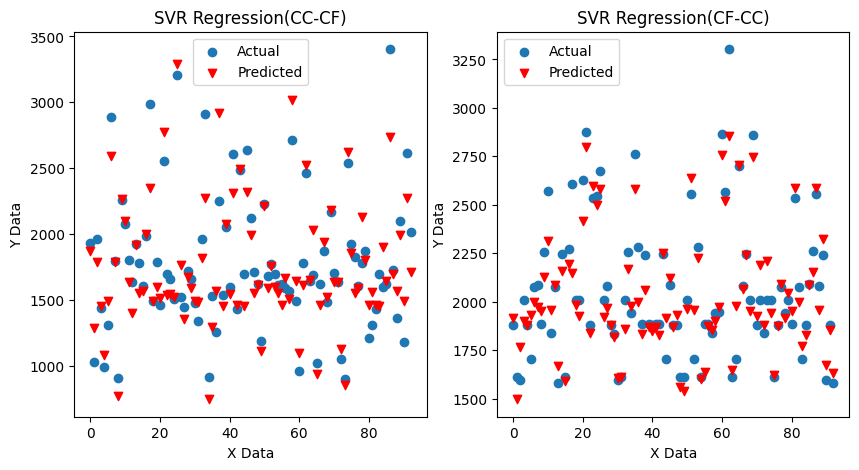

In [ ]:
indexer=np.arange(test_CCx.shape[0])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(indexer, test_CCy, label="Actual")
plt.scatter(indexer, predSVRCC, label="Predicted", marker='v', c='r')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("SVR Regression(CC-CF)")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(indexer, test_CFy, label="Actual")
plt.scatter(indexer, predSVRCF, label="Predicted", marker='v', c='r')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("SVR Regression(CF-CC)")
plt.legend()
plt.show()

## Using GridSearch to tune the hyperparameter
*Warning: Running this cell may take several minutes*

In [ ]:
svr_model = SVR(kernel='rbf')
param_grid = {
    'C': np.logspace(0, 6, 7),
    'epsilon': np.logspace(-5, 0, 6)
}
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(train_CCx, np.ravel(train_CCy))
best_params = grid_search.best_params_
print(f"Best Hyperparameters CC: {best_params}")
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(train_CFx, np.ravel(train_CFy))
best_params = grid_search.best_params_
print(f"Best Hyperparameters CF: {best_params}")

Best Hyperparameters CC: {'C': 100000.0, 'epsilon': 0.0001}
Best Hyperparameters CF: {'C': 1000.0, 'epsilon': 1e-05}


## Validation Curve for SVR

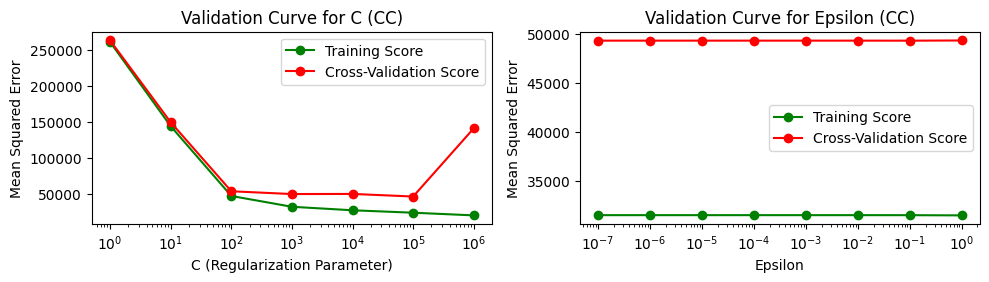

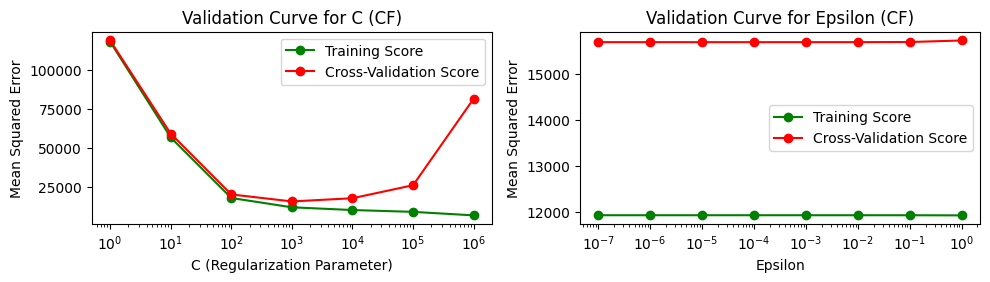

In [ ]:
param_range_C = np.logspace(0, 6, 7)
train_scores_C, test_scores_C = validation_curve(
    SVR(kernel='rbf', epsilon=best_params['epsilon']),
    train_CCx, np.ravel(train_CCy), param_name="C", param_range=param_range_C,
    scoring="neg_mean_squared_error", cv=5
)

param_range_epsilon = np.logspace(-7, 0, 8)
train_scores_epsilon, test_scores_epsilon = validation_curve(
    SVR(kernel='rbf', C=best_params['C']),
    train_CCx, np.ravel(train_CCy), param_name="epsilon", param_range=param_range_epsilon,
    scoring="neg_mean_squared_error", cv=5
)
plt.figure(figsize=(10, 5), dpi=100)
plt.subplot(2, 2, 1)
plt.plot(param_range_C, -np.mean(train_scores_C, axis=1), label="Training Score", color='green', marker='o')
plt.plot(param_range_C, -np.mean(test_scores_C, axis=1), label="Cross-Validation Score", color='red', marker='o')
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Mean Squared Error')
plt.title('Validation Curve for C (CC)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(param_range_epsilon, -np.mean(train_scores_epsilon, axis=1), label="Training Score", color='green', marker='o')
plt.plot(param_range_epsilon, -np.mean(test_scores_epsilon, axis=1), label="Cross-Validation Score", color='red', marker='o')
plt.xscale('log')
plt.xlabel('Epsilon')
plt.ylabel('Mean Squared Error')
plt.title('Validation Curve for Epsilon (CC)')
plt.legend()
plt.tight_layout()
train_scores_C, test_scores_C = validation_curve(
    SVR(kernel='rbf', epsilon=best_params['epsilon']),
    train_CFx, np.ravel(train_CFy), param_name="C", param_range=param_range_C,
    scoring="neg_mean_squared_error", cv=5
)

train_scores_epsilon, test_scores_epsilon = validation_curve(
    SVR(kernel='rbf', C=best_params['C']),
    train_CFx, np.ravel(train_CFy), param_name="epsilon", param_range=param_range_epsilon,
    scoring="neg_mean_squared_error", cv=5
)
plt.figure(figsize=(10, 5), dpi=100)
plt.subplot(2, 2, 3)
plt.plot(param_range_C, -np.mean(train_scores_C, axis=1), label="Training Score", color='green', marker='o')
plt.plot(param_range_C, -np.mean(test_scores_C, axis=1), label="Cross-Validation Score", color='red', marker='o')
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Mean Squared Error')
plt.title('Validation Curve for C (CF)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(param_range_epsilon, -np.mean(train_scores_epsilon, axis=1), label="Training Score", color='green', marker='o')
plt.plot(param_range_epsilon, -np.mean(test_scores_epsilon, axis=1), label="Cross-Validation Score", color='red', marker='o')
plt.xscale('log')
plt.xlabel('Epsilon')
plt.ylabel('Mean Squared Error')
plt.title('Validation Curve for Epsilon (CF)')
plt.legend()

plt.tight_layout()
plt.show()

### Evaluation for the SVR Model

In [ ]:
print("Evaluation for Model CC-CF")
print("Mean Squared Error:", mean_squared_error(test_CCy, predSVRCC))
print("Root Mean Square Error:", mean_squared_error(test_CCy, predSVRCC)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CCy, predSVRCC))
print("R2 Score:", r2_score(test_CCy, predSVRCC))
print("Explained Variance Score:", explained_variance_score(test_CCy, predSVRCC))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CCy) - predSVRCC) / np.ravel(test_CCy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CCy) - predSVRCC) / np.ravel(test_CCy)) * 100)
print('*'*100)
print("Evaluation for Model CF-CC")
print("Mean Squared Error:", mean_squared_error(test_CFy, predSVRCF))
print("Root Mean Square Error:", mean_squared_error(test_CFy, predSVRCF)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CFy, predSVRCF))
print("R2 Score:", r2_score(test_CFy, predSVRCF))
print("Explained Variance Score:", explained_variance_score(test_CFy, predSVRCF))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CFy) - predSVRCF) / np.ravel(test_CFy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CFy) - predSVRCF) / np.ravel(test_CFy)) * 100)

Evaluation for Model CC-CF
Mean Squared Error: 43436.46903321795
Root Mean Square Error: 208.4141766608451
Mean Absolute Error: 147.82329626269865
R2 Score: 0.8331552829506451
Explained Variance Score: 0.8367814105369777
Mean Absolute Percentage Error: 8.399367524417361
Mean Percentage Error: 0.7683270923335969
****************************************************************************************************
Evaluation for Model CF-CC
Mean Squared Error: 14874.698780187391
Root Mean Square Error: 121.96187428941633
Mean Absolute Error: 84.73056658668777
R2 Score: 0.882577832125743
Explained Variance Score: 0.887323474258427
Mean Absolute Percentage Error: 4.048214943248729
Mean Percentage Error: 0.7532032715313414


# J. k-Nearest Neighbour (kNN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

modelkNNCC=KNeighborsRegressor(n_neighbors=5)
modelkNNCC.fit(train_CCx, np.ravel(train_CCy))
predkNNCC=modelkNNCC.predict(test_CCx)

modelkNNCF=KNeighborsRegressor(n_neighbors=7)
modelkNNCF.fit(train_CFx, np.ravel(train_CFy))
predkNNCF=modelkNNCF.predict(test_CFx)

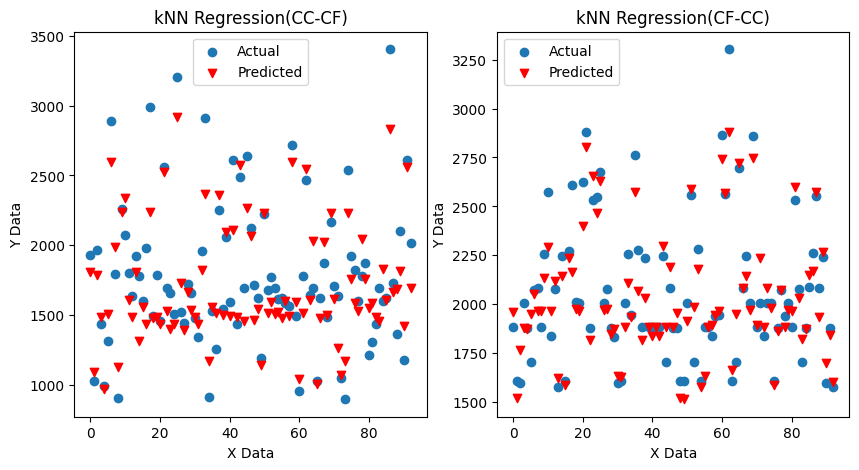

In [ ]:
indexer=np.arange(test_CCx.shape[0])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(indexer, test_CCy, label="Actual")
plt.scatter(indexer, predkNNCC, label="Predicted", marker='v', c='r')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("kNN Regression(CC-CF)")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(indexer, test_CFy, label="Actual")
plt.scatter(indexer, predkNNCF, label="Predicted", marker='v', c='r')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("kNN Regression(CF-CC)")
plt.legend()
plt.show()

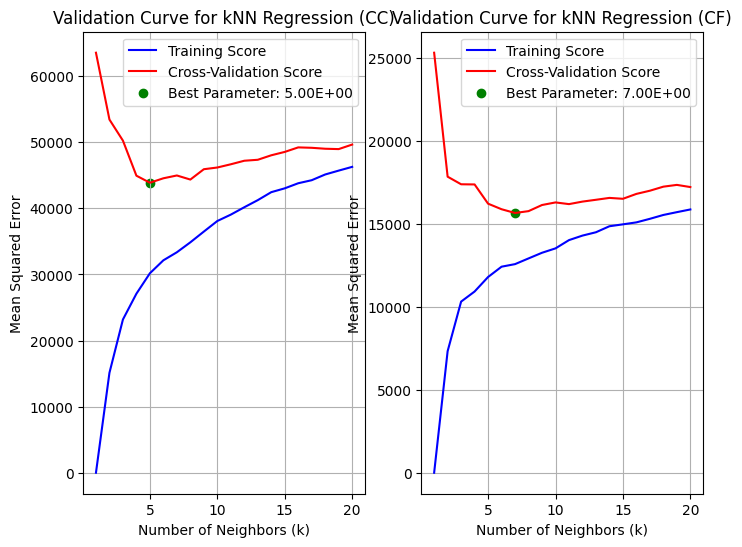

In [ ]:
knn_regressor = KNeighborsRegressor()
param_range = np.arange(1, 21)

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
train_scores, test_scores = validation_curve(
    knn_regressor, train_CCx, train_CCy, param_name="n_neighbors", param_range=param_range,
    scoring="neg_mean_squared_error", cv=5
)
train_scores = -train_scores
test_scores = -test_scores
min_test_score_index = np.argmin(np.mean(test_scores, axis=1))
min_test_score = np.mean(test_scores, axis=1)[min_test_score_index]
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training Score", color='blue')
plt.plot(param_range, np.mean(test_scores, axis=1), label="Cross-Validation Score", color='red')
plt.scatter(param_range[min_test_score_index], min_test_score, color='green', marker='o', label=f'Best Parameter: {param_range[min_test_score_index]:.2E}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('Validation Curve for kNN Regression (CC)')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
train_scores, test_scores = validation_curve(
    knn_regressor, train_CFx, train_CFy, param_name="n_neighbors", param_range=param_range,
    scoring="neg_mean_squared_error", cv=5
)
train_scores = -train_scores
test_scores = -test_scores
min_test_score_index = np.argmin(np.mean(test_scores, axis=1))
min_test_score = np.mean(test_scores, axis=1)[min_test_score_index]
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training Score", color='blue')
plt.plot(param_range, np.mean(test_scores, axis=1), label="Cross-Validation Score", color='red')
plt.scatter(param_range[min_test_score_index], min_test_score, color='green', marker='o', label=f'Best Parameter: {param_range[min_test_score_index]:.2E}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('Validation Curve for kNN Regression (CF)')
plt.grid(True)
plt.legend()
plt.show()

## Evaluation of the kNN Model

In [ ]:
print("Evaluation for Model CC-CF")
print("Mean Squared Error:", mean_squared_error(test_CCy, predkNNCC))
print("Root Mean Square Error:", mean_squared_error(test_CCy, predkNNCC)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CCy, predkNNCC))
print("R2 Score:", r2_score(test_CCy, predkNNCC))
print("Explained Variance Score:", explained_variance_score(test_CCy, predkNNCC))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CCy) - predkNNCC) / np.ravel(test_CCy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CCy) - predkNNCC) / np.ravel(test_CCy)) * 100)
print('*'*100)
print("Evaluation for Model CF-CC")
print("Mean Squared Error:", mean_squared_error(test_CFy, predkNNCF))
print("Root Mean Square Error:", mean_squared_error(test_CFy, predkNNCF)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CFy, predkNNCF))
print("R2 Score:", r2_score(test_CFy, predkNNCF))
print("Explained Variance Score:", explained_variance_score(test_CFy, predkNNCF))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CFy) - predkNNCF) / np.ravel(test_CFy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CFy) - predkNNCF) / np.ravel(test_CFy)) * 100)

Evaluation for Model CC-CF
Mean Squared Error: 50512.32043010754
Root Mean Square Error: 224.74946146789216
Mean Absolute Error: 171.66236559139784
R2 Score: 0.8059760842157183
Explained Variance Score: 0.8218948929573122
Mean Absolute Percentage Error: 9.752347109780914
Mean Percentage Error: 1.8470424285087543
****************************************************************************************************
Evaluation for Model CF-CC
Mean Squared Error: 14973.805354399821
Root Mean Square Error: 122.36750121825574
Mean Absolute Error: 87.2457757296467
R2 Score: 0.8817954761959466
Explained Variance Score: 0.8857393736897813
Mean Absolute Percentage Error: 4.191344724554211
Mean Percentage Error: 0.6562535243107649


# K. Gaussian Process Regressor

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

kernel=ConstantKernel(1.0, (1e-3, 1e3))*RBF(1.0, (1e-2, 1e2))
modelGPR=GaussianProcessRegressor(kernel=kernel, optimizer='fmin_l_bfgs_b',n_restarts_optimizer=10, random_state=42)
modelGPR.fit(train_CCx, train_CCy)
predGPRCC, sigmaCC=modelGPR.predict(test_CCx, return_std=True)
modelGPR.fit(train_CFx, train_CFy)
predGPRCF, sigmaCF=modelGPR.predict(test_CFx, return_std=True)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


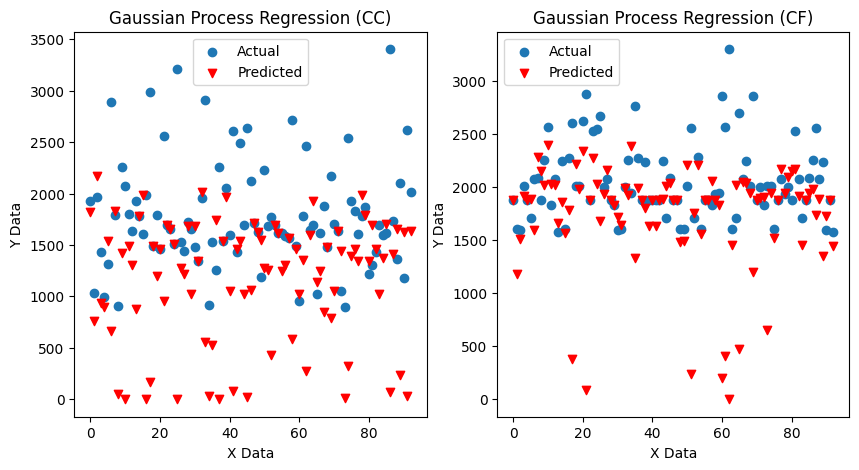

In [ ]:
indexer=np.arange(test_CCx.shape[0])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(indexer, test_CCy, label="Actual")
plt.scatter(indexer, predGPRCC, label="Predicted", color='red', marker='v')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Gaussian Process Regression (CC)")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(indexer, test_CFy, label="Actual")
plt.scatter(indexer, predGPRCF, label="Predicted", color='red', marker='v')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Gaussian Process Regression (CF)")
plt.legend()
plt.show()

## Model Evaluation for Gaussian Process Regression

In [ ]:
print("Evaluation for Model CC-CF")
print("Mean Squared Error:", mean_squared_error(test_CCy, predGPRCC))
print("Root Mean Square Error:", mean_squared_error(test_CCy, predGPRCC)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CCy, predGPRCC))
print("R2 Score:", r2_score(test_CCy, predGPRCC))
print("Explained Variance Score:", explained_variance_score(test_CCy, predGPRCC))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CCy) - predGPRCC) / np.ravel(test_CCy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CCy) - predGPRCC) / np.ravel(test_CCy)) * 100)
print('*'*100)
print("Evaluation for Model CF-CC")
print("Mean Squared Error:", mean_squared_error(test_CFy, predGPRCF))
print("Root Mean Square Error:", mean_squared_error(test_CFy, predGPRCF)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CFy, predGPRCF))
print("R2 Score:", r2_score(test_CFy, predGPRCF))
print("Explained Variance Score:", explained_variance_score(test_CFy, predGPRCF))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CFy) - predGPRCF) / np.ravel(test_CFy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CFy) - predGPRCF) / np.ravel(test_CFy)) * 100)

Evaluation for Model CC-CF
Mean Squared Error: 1204778.9428312478
Root Mean Square Error: 1097.6242266054662
Mean Absolute Error: 695.4639191952575
R2 Score: -3.627701245006304
Explained Variance Score: -2.2362897620341364
Mean Absolute Percentage Error: 34.0122461793576
Mean Percentage Error: 26.98132497473787
****************************************************************************************************
Evaluation for Model CF-CC
Mean Squared Error: 626084.9400159575
Root Mean Square Error: 791.2552938312372
Mean Absolute Error: 395.92791348615197
R2 Score: -3.942369053417009
Explained Variance Score: -3.142800815891018
Mean Absolute Percentage Error: 16.298135198116547
Mean Percentage Error: 12.073786438975915


# L. Neural Network

In [ ]:
!pip install tensorflow==2.9.0

In [ ]:
import tensorflow as tf

In [ ]:
modelTFCC=tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='linear', kernel_initializer='normal', input_shape=(15, )),
    tf.keras.layers.Dense(256, activation='linear', kernel_initializer='normal'),
    tf.keras.layers.Dense(256, activation='linear', kernel_initializer='normal'),
    tf.keras.layers.Dense(256, activation='linear', kernel_initializer='normal'),
    tf.keras.layers.Dense(64, activation='linear', kernel_initializer='normal'),
    tf.keras.layers.Dense(1, activation='linear', kernel_initializer='normal')
])
modelTFCC.build()
modelTFCC.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
modelTFCC.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4096      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 217,985
Trainable params: 217,985
Non-trai

In [ ]:
historyCC=modelTFCC.fit(train_CCx, train_CCy, epochs=110, verbose=0, validation_split=0.1)
predTFCC=modelTFCC.predict(test_CCx)

3/3 [==============================] - 0s 5ms/step


In [ ]:
modelTFCF=tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='linear', kernel_initializer='normal', input_shape=(16, )),
    tf.keras.layers.Dense(256, activation='linear', kernel_initializer='normal'),
    tf.keras.layers.Dense(256, activation='linear', kernel_initializer='normal'),
    tf.keras.layers.Dense(256, activation='linear', kernel_initializer='normal'),
    tf.keras.layers.Dense(64, activation='linear', kernel_initializer='normal'),
    tf.keras.layers.Dense(1, activation='linear', kernel_initializer='normal')
])
modelTFCF.build()
modelTFCF.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
modelTFCF.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               2176      
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 183,297
Trainable params: 183,297
Non-tr

In [ ]:
historyCF=modelTFCF.fit(train_CFx, train_CFy, epochs=120, verbose=0, validation_split=0.1)
predTFCF=modelTFCF.predict(test_CFx)

3/3 [==============================] - 0s 8ms/step


## Attempted Best Neural Network Predictions

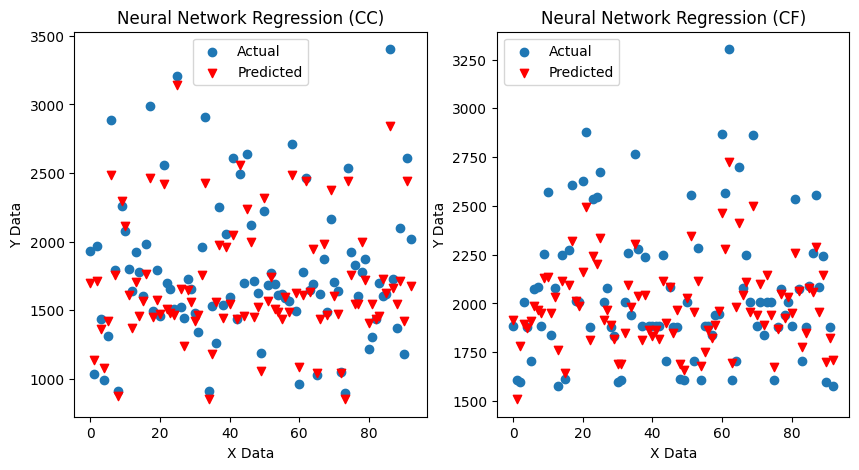

In [ ]:
indexer=np.arange(test_CCx.shape[0])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(indexer, test_CCy, label="Actual")
plt.scatter(indexer, predTFCC, label="Predicted", color='red', marker='v')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Neural Network Regression (CC)")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(indexer, test_CFy, label="Actual")
plt.scatter(indexer, predTFCF, label="Predicted", color='red', marker='v')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Neural Network Regression (CF)")
plt.legend()
plt.show()

## Neural Network Regression Evaluation

In [ ]:
print("Evaluation for Model CC-CF")
print("Mean Squared Error:", mean_squared_error(test_CCy, predTFCC))
print("Root Mean Square Error:", mean_squared_error(test_CCy, predTFCC)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CCy, predTFCC))
print("R2 Score:", r2_score(test_CCy, predTFCC))
print("Explained Variance Score:", explained_variance_score(test_CCy, predTFCC))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CCy) - predTFCC) / np.ravel(test_CCy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CCy) - predTFCC) / np.ravel(test_CCy)) * 100)
print('*'*100)
print("Evaluation for Model CF-CC")
print("Mean Squared Error:", mean_squared_error(test_CFy, predTFCF))
print("Root Mean Square Error:", mean_squared_error(test_CFy, predTFCF)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CFy, predTFCF))
print("R2 Score:", r2_score(test_CFy, predTFCF))
print("Explained Variance Score:", explained_variance_score(test_CFy, predTFCF))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CFy) - predTFCF) / np.ravel(test_CFy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CFy) - predTFCF) / np.ravel(test_CFy)) * 100)

Evaluation for Model CC-CF
Mean Squared Error: 41401.27889606569
Root Mean Square Error: 203.47304218511525
Mean Absolute Error: 160.0632803311912
R2 Score: 0.8409726937607901
Explained Variance Score: 0.8737461243401929
Mean Absolute Percentage Error: 29.917955257382335
Mean Percentage Error: -2.595432634326097
****************************************************************************************************
Evaluation for Model CF-CC
Mean Squared Error: 32745.112694274994
Root Mean Square Error: 180.95610709305998
Mean Absolute Error: 132.11515561995967
R2 Score: 0.7415072280340871
Explained Variance Score: 0.7785921181907429
Mean Absolute Percentage Error: 15.134950593711649
Mean Percentage Error: 0.6876835085551322


# M. Bayesian Regression

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


<Figure size 500x500 with 0 Axes>

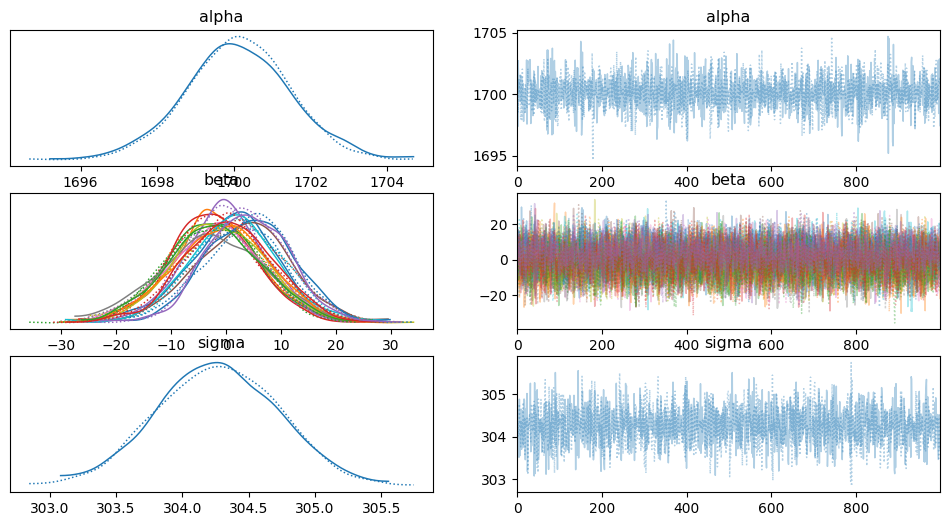

In [ ]:
import pymc as pm

with pm.Model() as model:
  alpha=pm.Normal('alpha', mu=0, sigma=10)
  beta=pm.Normal('beta', mu=0, sigma=10, shape=15)
  sigma=pm.HalfNormal('sigma', sigma=1)
  mu=alpha+pm.math.dot(train_CCx, beta)
  y_obs=pm.Normal('y_obs', mu=mu, sigma=sigma, observed=train_CCy)
  trace=pm.sample(1000, tune=1000, cores=1)
plt.figure(figsize=(5, 5))
pm.plot_trace(trace)
plt.show()

I am leaving the Bayesian Regression for now.

# N. AdaBoost Regression

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

modelABRCC=AdaBoostRegressor(n_estimators=110)
modelABRCC.fit(train_CCx, np.ravel(train_CCy))

predABRCC=modelABRCC.predict(test_CCx)

modelABRCF=AdaBoostRegressor(n_estimators=70)
modelABRCF.fit(train_CFx, np.ravel(train_CFy))
predABRCF=modelABRCF.predict(test_CFx)

# Prediction of AdaBoost Regressor

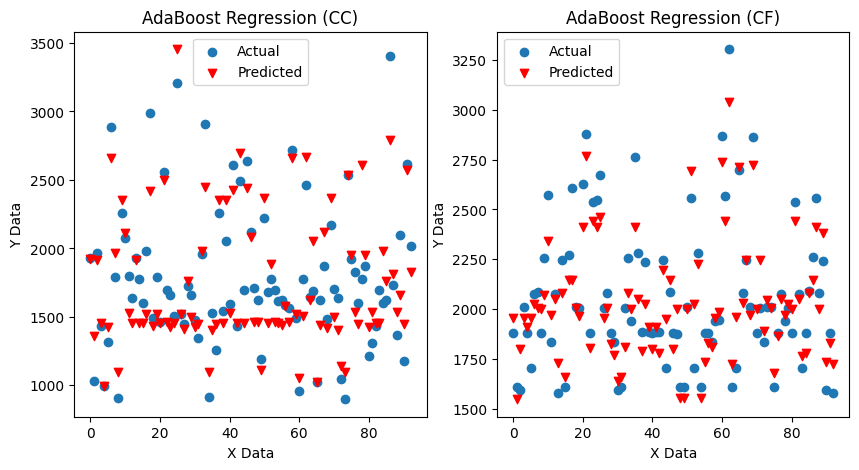

In [ ]:
indexer=np.arange(test_CCx.shape[0])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(indexer, test_CCy, label="Actual")
plt.scatter(indexer, predABRCC, label="Predicted", color='red', marker='v')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("AdaBoost Regression (CC)")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(indexer, test_CFy, label="Actual")
plt.scatter(indexer, predABRCF, label="Predicted", color='red', marker='v')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("AdaBoost Regression (CF)")
plt.legend()
plt.show()

## Validation Curve for Different numbers of estimators

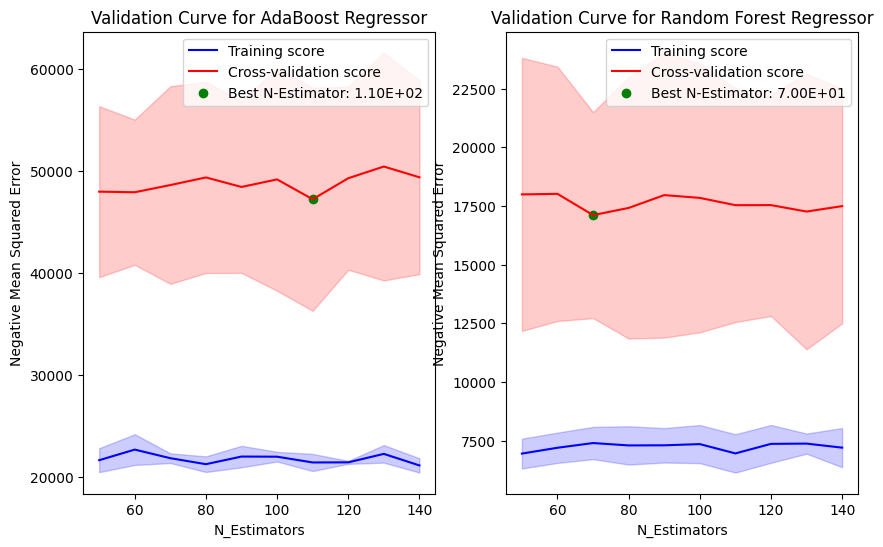

In [ ]:
estimators = np.arange(50, 150, 10)
regressorAB = AdaBoostRegressor()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
train_scores, test_scores = validation_curve(regressorAB,train_CCx, np.ravel(train_CCy), param_name="n_estimators", param_range=estimators, scoring="neg_mean_squared_error", cv=4)
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
best_estimator_index=np.argmin(test_scores_mean)
plt.plot(estimators, train_scores_mean, label="Training score", color="blue")
plt.fill_between(estimators, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(estimators, test_scores_mean, label="Cross-validation score", color="red")
plt.fill_between(estimators, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="red")
plt.scatter(estimators[best_estimator_index], test_scores_mean[best_estimator_index], color='green', marker='o', label=f'Best N-Estimator: {estimators[best_estimator_index]:.2E}')
plt.title("Validation Curve for AdaBoost Regressor")
plt.xlabel("N_Estimators")
plt.ylabel("Negative Mean Squared Error")
plt.legend(loc="best")
plt.subplot(1, 2, 2)
train_scores, test_scores = validation_curve(regressorAB,train_CFx, np.ravel(train_CFy), param_name="n_estimators", param_range=estimators, scoring="neg_mean_squared_error", cv=4)
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
best_estimator_index=np.argmin(test_scores_mean)
plt.plot(estimators, train_scores_mean, label="Training score", color="blue")
plt.fill_between(estimators, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(estimators, test_scores_mean, label="Cross-validation score", color="red")
plt.fill_between(estimators, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="red")
plt.scatter(estimators[best_estimator_index], test_scores_mean[best_estimator_index], color='green', marker='o', label=f'Best N-Estimator: {estimators[best_estimator_index]:.2E}')
plt.title("Validation Curve for Random Forest Regressor")
plt.xlabel("N_Estimators")
plt.ylabel("Negative Mean Squared Error")
plt.legend(loc="best")
plt.show()

## AdaBoost Regressor Evaluation

In [ ]:
print("Evaluation for Model CC-CF")
print("Mean Squared Error:", mean_squared_error(test_CCy, predABRCC))
print("Root Mean Square Error:", mean_squared_error(test_CCy, predABRCC)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CCy, predABRCC))
print("R2 Score:", r2_score(test_CCy, predABRCC))
print("Explained Variance Score:", explained_variance_score(test_CCy, predABRCC))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CCy) - predABRCC) / np.ravel(test_CCy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CCy) - predABRCC) / np.ravel(test_CCy)) * 100)
print('*'*100)
print("Evaluation for Model CF-CC")
print("Mean Squared Error:", mean_squared_error(test_CFy, predABRCF))
print("Root Mean Square Error:", mean_squared_error(test_CFy, predABRCF)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CFy, predABRCF))
print("R2 Score:", r2_score(test_CFy, predABRCF))
print("Explained Variance Score:", explained_variance_score(test_CFy, predABRCF))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CFy) - predABRCF) / np.ravel(test_CFy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CFy) - predABRCF) / np.ravel(test_CFy)) * 100)

Evaluation for Model CC-CF
Mean Squared Error: 49005.21092254309
Root Mean Square Error: 221.37120617312246
Mean Absolute Error: 168.15165570566742
R2 Score: 0.8117650736282712
Explained Variance Score: 0.814986764351214
Mean Absolute Percentage Error: 9.707716585137613
Mean Percentage Error: 0.4845809958776457
****************************************************************************************************
Evaluation for Model CF-CC
Mean Squared Error: 18082.75425591823
Root Mean Square Error: 134.4721318932597
Mean Absolute Error: 104.57720769190128
R2 Score: 0.8572531627534163
Explained Variance Score: 0.8618466779368812
Mean Absolute Percentage Error: 5.064718356842271
Mean Percentage Error: 0.558243239656556


# O. ExtraTrees Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

modelETRCC=ExtraTreesRegressor(n_estimators=130, random_state=42)
modelETRCC.fit(train_CCx, np.ravel(train_CCy))
predETRCC=modelETRCC.predict(test_CCx)

modelETRCF=ExtraTreesRegressor(n_estimators=100, random_state=42)
modelETRCF.fit(train_CFx, np.ravel(train_CFy))
predETRCF=modelETRCF.predict(test_CFx)

## Prediction Plot of ExtraTrees Regressor

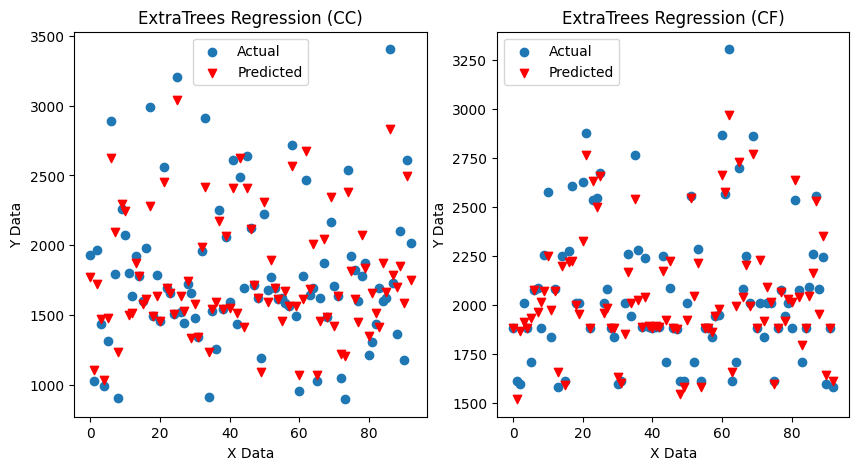

In [ ]:
indexer=np.arange(test_CCx.shape[0])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(indexer, test_CCy, label="Actual")
plt.scatter(indexer, predETRCC, label="Predicted", color='red', marker='v')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("ExtraTrees Regression (CC)")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(indexer, test_CFy, label="Actual")
plt.scatter(indexer, predETRCF, label="Predicted", color='red', marker='v')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("ExtraTrees Regression (CF)")
plt.legend()
plt.show()

## Validation Curve of ExtraTrees Regressor for different values of **n_estimators**

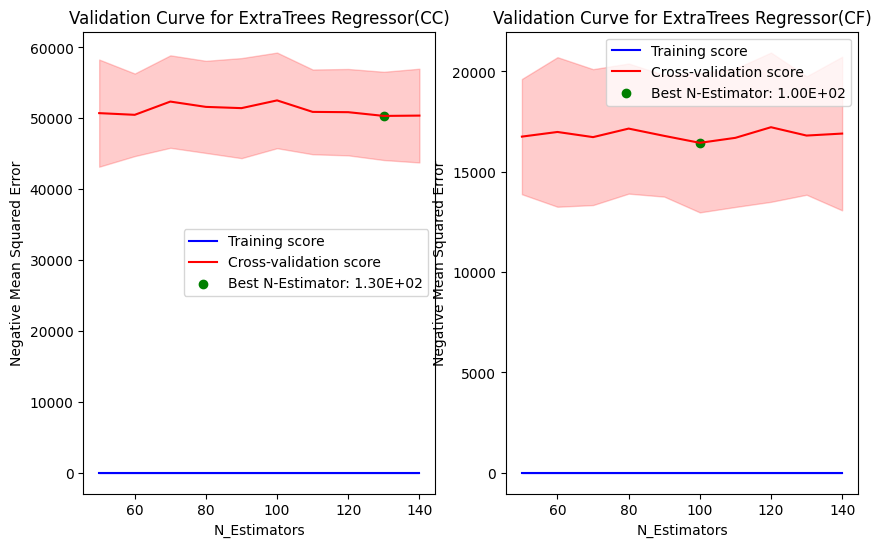

In [ ]:
estimators = np.arange(50, 150, 10)
regressorET = ExtraTreesRegressor()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
train_scores, test_scores = validation_curve(regressorET,train_CCx, np.ravel(train_CCy), param_name="n_estimators", param_range=estimators, scoring="neg_mean_squared_error", cv=4)
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
best_estimator_index=np.argmin(test_scores_mean)
plt.plot(estimators, train_scores_mean, label="Training score", color="blue")
plt.fill_between(estimators, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(estimators, test_scores_mean, label="Cross-validation score", color="red")
plt.fill_between(estimators, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="red")
plt.scatter(estimators[best_estimator_index], test_scores_mean[best_estimator_index], color='green', marker='o', label=f'Best N-Estimator: {estimators[best_estimator_index]:.2E}')
plt.title("Validation Curve for ExtraTrees Regressor(CC)")
plt.xlabel("N_Estimators")
plt.ylabel("Negative Mean Squared Error")
plt.legend(loc="best")
plt.subplot(1, 2, 2)
train_scores, test_scores = validation_curve(regressorET,train_CFx, np.ravel(train_CFy), param_name="n_estimators", param_range=estimators, scoring="neg_mean_squared_error", cv=4)
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
best_estimator_index=np.argmin(test_scores_mean)
plt.plot(estimators, train_scores_mean, label="Training score", color="blue")
plt.fill_between(estimators, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(estimators, test_scores_mean, label="Cross-validation score", color="red")
plt.fill_between(estimators, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="red")
plt.scatter(estimators[best_estimator_index], test_scores_mean[best_estimator_index], color='green', marker='o', label=f'Best N-Estimator: {estimators[best_estimator_index]:.2E}')
plt.title("Validation Curve for ExtraTrees Regressor(CF)")
plt.xlabel("N_Estimators")
plt.ylabel("Negative Mean Squared Error")
plt.legend(loc="best")
plt.show()

## ExtraTrees Regressor Model Evaluation

In [ ]:
print("Evaluation for Model CC-CF")
print("Mean Squared Error:", mean_squared_error(test_CCy, predETRCC))
print("Root Mean Square Error:", mean_squared_error(test_CCy, predETRCC)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CCy, predETRCC))
print("R2 Score:", r2_score(test_CCy, predETRCC))
print("Explained Variance Score:", explained_variance_score(test_CCy, predETRCC))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CCy) - predETRCC) / np.ravel(test_CCy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CCy) - predETRCC) / np.ravel(test_CCy)) * 100)
print('*'*100)
print("Evaluation for Model CF-CC")
print("Mean Squared Error:", mean_squared_error(test_CFy, predETRCF))
print("Root Mean Square Error:", mean_squared_error(test_CFy, predETRCF)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CFy, predETRCF))
print("R2 Score:", r2_score(test_CFy, predETRCF))
print("Explained Variance Score:", explained_variance_score(test_CFy, predETRCF))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CFy) - predETRCF) / np.ravel(test_CFy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CFy) - predETRCF) / np.ravel(test_CFy)) * 100)

Evaluation for Model CC-CF
Mean Squared Error: 41513.37201819685
Root Mean Square Error: 203.74830555908153
Mean Absolute Error: 149.31439205955334
R2 Score: 0.8405421305575322
Explained Variance Score: 0.8412415401495186
Mean Absolute Percentage Error: 8.830552828176813
Mean Percentage Error: -1.165685333624348
****************************************************************************************************
Evaluation for Model CF-CC
Mean Squared Error: 15216.839593548388
Root Mean Square Error: 123.35655472470195
Mean Absolute Error: 81.25397849462367
R2 Score: 0.8798769427419109
Explained Variance Score: 0.8814418692867868
Mean Absolute Percentage Error: 3.871018855211563
Mean Percentage Error: 0.18642179286880692


# P. Bagging Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor

modelBRCC=BaggingRegressor(n_estimators=80)
modelBRCC.fit(train_CCx, np.ravel(train_CCy))
predBRCC=modelBRCC.predict(test_CCx)

modelBRCF=BaggingRegressor(n_estimators=50)
modelBRCF.fit(train_CFx, np.ravel(train_CFy))
predBRCF=modelBRCF.predict(test_CFx)

## Prediction Plot of Bagging Regressor

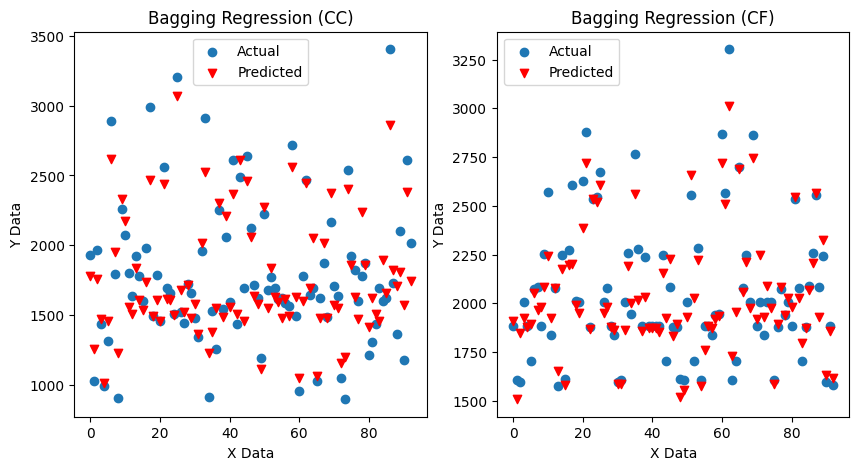

In [ ]:
indexer=np.arange(test_CCx.shape[0])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(indexer, test_CCy, label="Actual")
plt.scatter(indexer, predBRCC, label="Predicted", color='red', marker='v')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Bagging Regression (CC)")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(indexer, test_CFy, label="Actual")
plt.scatter(indexer, predBRCF, label="Predicted", color='red', marker='v')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Bagging Regression (CF)")
plt.legend()
plt.show()

## Validation Curve of Bagging Regressor Score for Different Values of **n_estimators**

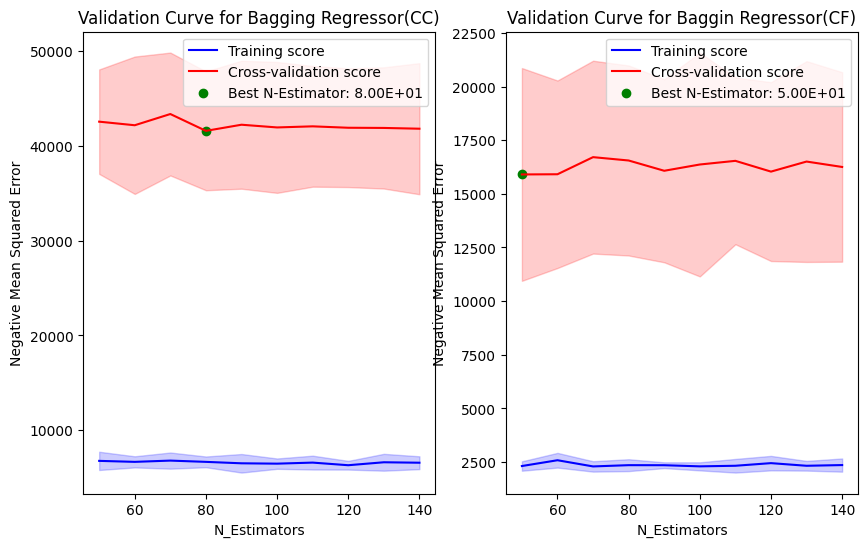

In [ ]:
estimators = np.arange(50, 150, 10)
regressorB = BaggingRegressor()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
train_scores, test_scores = validation_curve(regressorB,train_CCx, np.ravel(train_CCy), param_name="n_estimators", param_range=estimators, scoring="neg_mean_squared_error", cv=4)
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
best_estimator_index=np.argmin(test_scores_mean)
plt.plot(estimators, train_scores_mean, label="Training score", color="blue")
plt.fill_between(estimators, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(estimators, test_scores_mean, label="Cross-validation score", color="red")
plt.fill_between(estimators, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="red")
plt.scatter(estimators[best_estimator_index], test_scores_mean[best_estimator_index], color='green', marker='o', label=f'Best N-Estimator: {estimators[best_estimator_index]:.2E}')
plt.title("Validation Curve for Bagging Regressor(CC)")
plt.xlabel("N_Estimators")
plt.ylabel("Negative Mean Squared Error")
plt.legend(loc="best")
plt.subplot(1, 2, 2)
train_scores, test_scores = validation_curve(regressorB,train_CFx, np.ravel(train_CFy), param_name="n_estimators", param_range=estimators, scoring="neg_mean_squared_error", cv=4)
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
best_estimator_index=np.argmin(test_scores_mean)
plt.plot(estimators, train_scores_mean, label="Training score", color="blue")
plt.fill_between(estimators, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(estimators, test_scores_mean, label="Cross-validation score", color="red")
plt.fill_between(estimators, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="red")
plt.scatter(estimators[best_estimator_index], test_scores_mean[best_estimator_index], color='green', marker='o', label=f'Best N-Estimator: {estimators[best_estimator_index]:.2E}')
plt.title("Validation Curve for Baggin Regressor(CF)")
plt.xlabel("N_Estimators")
plt.ylabel("Negative Mean Squared Error")
plt.legend(loc="best")
plt.show()

## Bagging Regressor Model Evaluation

In [ ]:
print("Evaluation for Model CC-CF")
print("Mean Squared Error:", mean_squared_error(test_CCy, predBRCC))
print("Root Mean Square Error:", mean_squared_error(test_CCy, predBRCC)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CCy, predBRCC))
print("R2 Score:", r2_score(test_CCy, predBRCC))
print("Explained Variance Score:", explained_variance_score(test_CCy, predBRCC))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CCy) - predBRCC) / np.ravel(test_CCy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CCy) - predBRCC) / np.ravel(test_CCy)) * 100)
print('*'*100)
print("Evaluation for Model CF-CC")
print("Mean Squared Error:", mean_squared_error(test_CFy, predBRCF))
print("Root Mean Square Error:", mean_squared_error(test_CFy, predBRCF)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CFy, predBRCF))
print("R2 Score:", r2_score(test_CFy, predBRCF))
print("Explained Variance Score:", explained_variance_score(test_CFy, predBRCF))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CFy) - predBRCF) / np.ravel(test_CFy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CFy) - predBRCF) / np.ravel(test_CFy)) * 100)

Evaluation for Model CC-CF
Mean Squared Error: 36152.78725638441
Root Mean Square Error: 190.13886308796634
Mean Absolute Error: 149.49986559139785
R2 Score: 0.8611327832443264
Explained Variance Score: 0.862015549181571
Mean Absolute Percentage Error: 8.959857069511292
Mean Percentage Error: -0.9963476656264085
****************************************************************************************************
Evaluation for Model CF-CC
Mean Squared Error: 14290.713212903225
Root Mean Square Error: 119.54377111712355
Mean Absolute Error: 83.17075268817203
R2 Score: 0.8871878650636282
Explained Variance Score: 0.8907109220294654
Mean Absolute Percentage Error: 4.004536425206428
Mean Percentage Error: 0.5650115881907564


# Q. Isotonic Regressor

In [ ]:
from sklearn.isotonic import IsotonicRegression

bestCC=[np.Inf, -1, None]
for i in range(test_CCx.shape[1]):
  modelIRCC=IsotonicRegression(out_of_bounds='clip')
  modelIRCC.fit(train_CCx[:, i], np.ravel(train_CCy))
  predIRCC=modelIRCC.predict(test_CCx[:, i])
  mse=mean_squared_error(test_CCy, predIRCC)
  if mse<bestCC[0]:
    bestCC=[mse, i, predIRCC]

bestCF=[np.Inf, -1, None]
for i in range(test_CFx.shape[1]):
  modelIRCF=IsotonicRegression(out_of_bounds='clip')
  modelIRCF.fit(train_CFx[:, i], np.ravel(train_CFy))
  predIRCF=modelIRCF.predict(test_CFx[:, i])
  mse=mean_squared_error(test_CFy, predIRCF)
  if mse<bestCF[0]:
    bestCF=[mse, i, predIRCF]

### Choosing the Best Feature for Isotonic Regression

In [ ]:
predIRCC=bestCC[2]
predIRCF=bestCF[2]

## Prediction Plot for Isotonic Reression

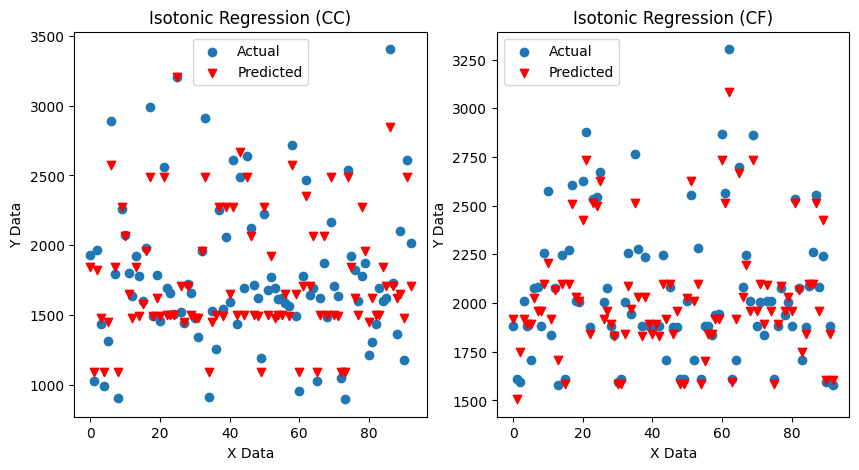

In [ ]:
indexer=np.arange(test_CCx.shape[0])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(indexer, test_CCy, label="Actual")
plt.scatter(indexer, predIRCC, label="Predicted", color='red', marker='v')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Isotonic Regression (CC)")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(indexer, test_CFy, label="Actual")
plt.scatter(indexer, predIRCF, label="Predicted", color='red', marker='v')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Isotonic Regression (CF)")
plt.legend()
plt.show()

## Isotonic Regressor Evaluation

In [ ]:
print("Evaluation for Model CC-CF")
print("Mean Squared Error:", mean_squared_error(test_CCy, predIRCC))
print("Root Mean Square Error:", mean_squared_error(test_CCy, predIRCC)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CCy, predIRCC))
print("R2 Score:", r2_score(test_CCy, predIRCC))
print("Explained Variance Score:", explained_variance_score(test_CCy, predIRCC))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CCy) - predIRCC) / np.ravel(test_CCy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CCy) - predIRCC) / np.ravel(test_CCy)) * 100)
print('*'*100)
print("Evaluation for Model CF-CC")
print("Mean Squared Error:", mean_squared_error(test_CFy, predIRCF))
print("Root Mean Square Error:", mean_squared_error(test_CFy, predIRCF)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CFy, predIRCF))
print("R2 Score:", r2_score(test_CFy, predIRCF))
print("Explained Variance Score:", explained_variance_score(test_CFy, predIRCF))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CFy) - predIRCF) / np.ravel(test_CFy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CFy) - predIRCF) / np.ravel(test_CFy)) * 100)

Evaluation for Model CC-CF
Mean Squared Error: 35868.30387934793
Root Mean Square Error: 189.3892918814259
Mean Absolute Error: 146.58200488974865
R2 Score: 0.8622255182111258
Explained Variance Score: 0.8640880988621695
Mean Absolute Percentage Error: 8.565144439169279
Mean Percentage Error: -0.2566924783261149
****************************************************************************************************
Evaluation for Model CF-CC
Mean Squared Error: 12613.24585174119
Root Mean Square Error: 112.3087078179657
Mean Absolute Error: 82.085191520535
R2 Score: 0.9004299385332648
Explained Variance Score: 0.9080033443661734
Mean Absolute Percentage Error: 3.9130969040460197
Mean Percentage Error: 1.091537285845383


# R. Huber Regressor

In [ ]:
from sklearn.linear_model import HuberRegressor

modelHRCC=HuberRegressor(epsilon=1.5, max_iter=10000)
modelHRCC.fit(train_CCx, np.ravel(train_CCy))
predHRCC=modelHRCC.predict(test_CCx)

modelHRCF=HuberRegressor(epsilon=1.45, max_iter=10000)
modelHRCC.fit(train_CFx, np.ravel(train_CFy))
predHRCF=modelHRCC.predict(test_CFx)

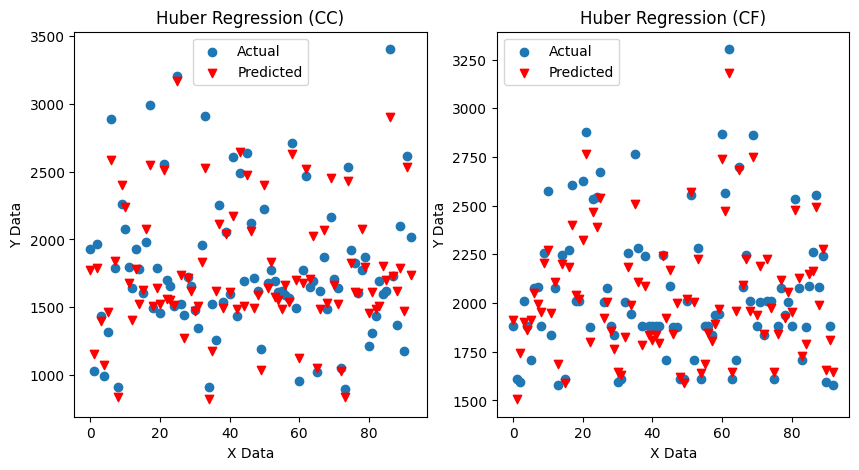

In [ ]:
indexer=np.arange(test_CCx.shape[0])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(indexer, test_CCy, label="Actual")
plt.scatter(indexer, predHRCC, label="Predicted", color='red', marker='v')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Huber Regression (CC)")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(indexer, test_CFy, label="Actual")
plt.scatter(indexer, predHRCF, label="Predicted", color='red', marker='v')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Huber Regression (CF)")
plt.legend()
plt.show()

## Validation Curve for Huber Regression Model for Different Values of *epsilon*

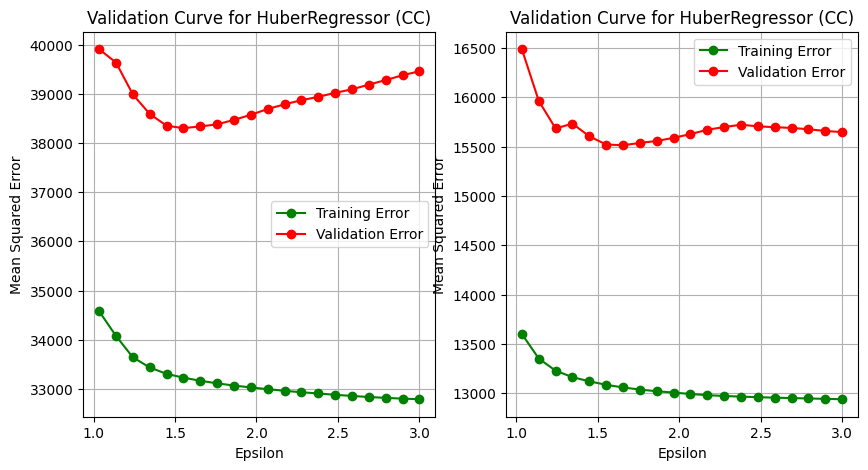

In [ ]:
epsilon_range = np.linspace(0.0, 3.0, 30)
huber_model = HuberRegressor(max_iter=10000)
train_scores, test_scores = validation_curve(
    huber_model, train_CCx, np.ravel(train_CCy),
    param_name="epsilon", param_range=epsilon_range,
    scoring="neg_mean_squared_error", cv=5
)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epsilon_range, -np.mean(train_scores, axis=1), label="Training Error", color='green', marker='o')
plt.plot(epsilon_range, -np.mean(test_scores, axis=1), label="Validation Error", color='red', marker='o')
plt.title("Validation Curve for HuberRegressor (CC)")
plt.xlabel("Epsilon")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
huber_model = HuberRegressor(max_iter=10000)
train_scores, test_scores = validation_curve(
    huber_model, train_CFx, np.ravel(train_CFy),
    param_name="epsilon", param_range=epsilon_range,
    scoring="neg_mean_squared_error", cv=5
)
plt.plot(epsilon_range, -np.mean(train_scores, axis=1), label="Training Error", color='green', marker='o')
plt.plot(epsilon_range, -np.mean(test_scores, axis=1), label="Validation Error", color='red', marker='o')
plt.title("Validation Curve for HuberRegressor (CC)")
plt.xlabel("Epsilon")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()

## Huber Regressor Evaluation

In [ ]:
print("Evaluation for Model CC-CF")
print("Mean Squared Error:", mean_squared_error(test_CCy, predHRCC))
print("Root Mean Square Error:", mean_squared_error(test_CCy, predHRCC)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CCy, predHRCC))
print("R2 Score:", r2_score(test_CCy, predHRCC))
print("Explained Variance Score:", explained_variance_score(test_CCy, predHRCC))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CCy) - predHRCC) / np.ravel(test_CCy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CCy) - predHRCC) / np.ravel(test_CCy)) * 100)
print('*'*100)
print("Evaluation for Model CF-CC")
print("Mean Squared Error:", mean_squared_error(test_CFy, predHRCF))
print("Root Mean Square Error:", mean_squared_error(test_CFy, predHRCF)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CFy, predHRCF))
print("R2 Score:", r2_score(test_CFy, predHRCF))
print("Explained Variance Score:", explained_variance_score(test_CFy, predHRCF))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CFy) - predHRCF) / np.ravel(test_CFy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CFy) - predHRCF) / np.ravel(test_CFy)) * 100)

Evaluation for Model CC-CF
Mean Squared Error: 32118.319922464845
Root Mean Square Error: 179.2158472972322
Mean Absolute Error: 140.62084100013251
R2 Score: 0.8766296589286253
Explained Variance Score: 0.8794002425455687
Mean Absolute Percentage Error: 8.120019908883748
Mean Percentage Error: 0.5180073360404828
****************************************************************************************************
Evaluation for Model CF-CC
Mean Squared Error: 11985.538573423688
Root Mean Square Error: 109.47848452286726
Mean Absolute Error: 83.92821448254554
R2 Score: 0.9053851144665527
Explained Variance Score: 0.9088180662800412
Mean Absolute Percentage Error: 4.085603121413504
Mean Percentage Error: 0.5767792756990359


# S. Passive Agressive Regressor

In [ ]:
from sklearn.linear_model import PassiveAggressiveRegressor

modelPACC=PassiveAggressiveRegressor(C=10, epsilon=1, random_state=42)
modelPACC.fit(train_CCx, np.ravel(train_CCy))
predPACC=modelPACC.predict(test_CCx)

modelPACF=PassiveAggressiveRegressor(C=10.0, epsilon=1, random_state=42)
modelPACF.fit(train_CFx, np.ravel(train_CFy))
predPACF=modelPACF.predict(test_CFx)

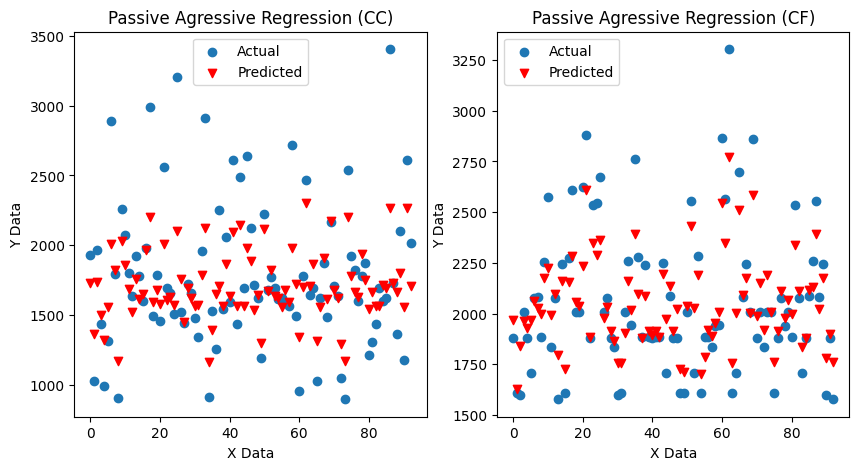

In [ ]:
indexer=np.arange(test_CCx.shape[0])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(indexer, test_CCy, label="Actual")
plt.scatter(indexer, predPACC, label="Predicted", color='red', marker='v')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Passive Agressive Regression (CC)")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(indexer, test_CFy, label="Actual")
plt.scatter(indexer, predPACF, label="Predicted", color='red', marker='v')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Passive Agressive Regression (CF)")
plt.legend()
plt.show()

## Validation Plot for PassiveAgressive Regressor

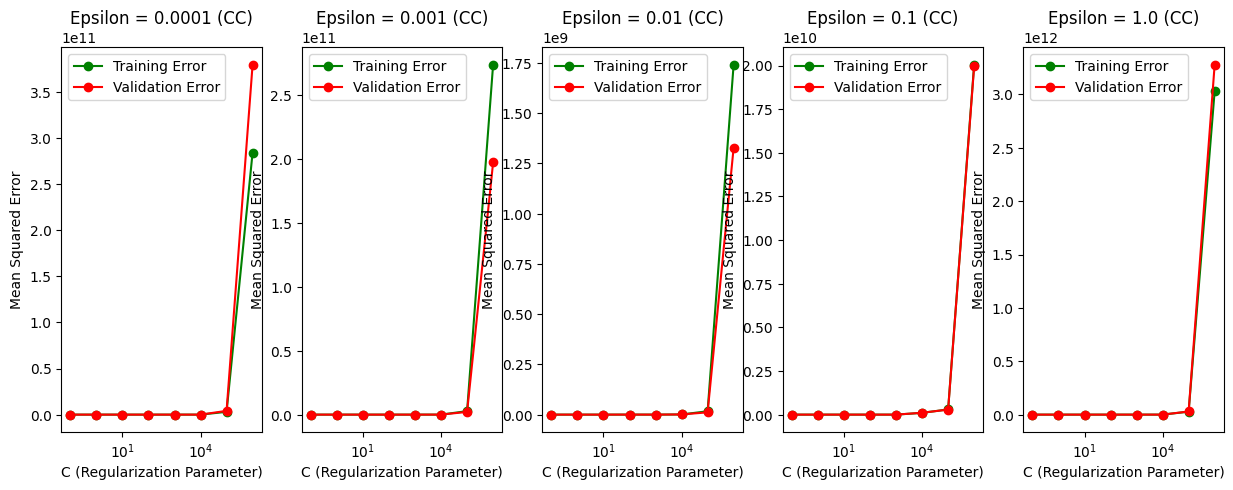

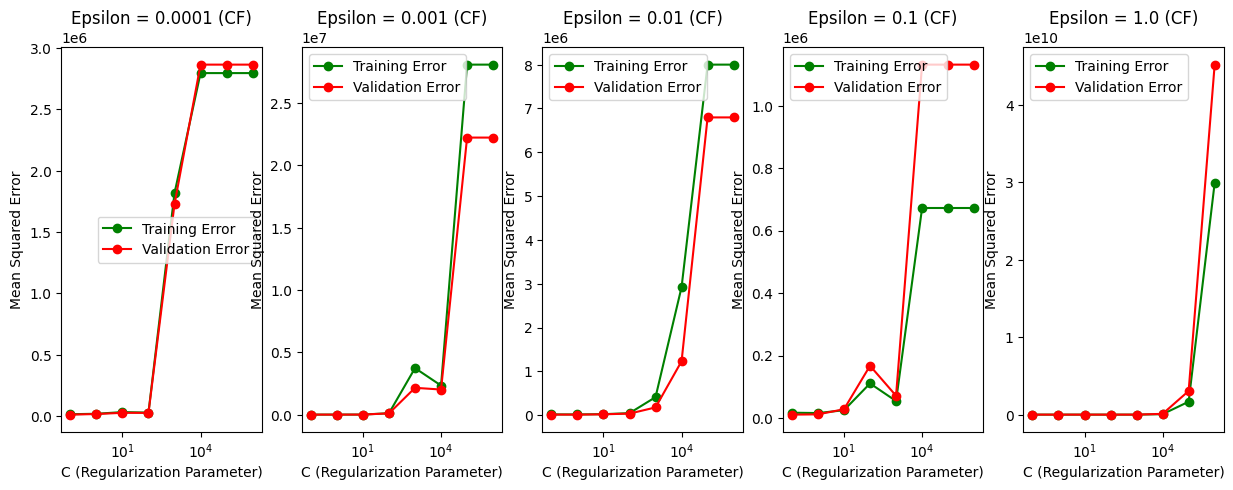

In [ ]:
C_range = np.logspace(-1, 6, 8)
epsilon_range = np.logspace(-4, 0, 5)

pa_regressor = PassiveAggressiveRegressor(random_state=42, max_iter=40000)
param_grid = {'C': C_range, 'epsilon': epsilon_range}
train_scores, test_scores = validation_curve(
    pa_regressor, train_CCx, np.ravel(train_CCy),
    param_name="C", param_range=C_range,
    scoring="neg_mean_squared_error", cv=5
)

train_scores.shape

plt.figure(figsize=(15, 5))
for i, epsilon_value in enumerate(epsilon_range):
    plt.subplot(1, len(epsilon_range), i + 1)
    plt.plot(C_range, -train_scores[:, i], label="Training Error", color='green', marker='o')
    plt.plot(C_range, -test_scores[:, i], label="Validation Error", color='red', marker='o')
    plt.xscale('log')
    plt.title(f"Epsilon = {epsilon_value} (CC)")
    plt.xlabel("C (Regularization Parameter)")
    plt.ylabel("Mean Squared Error")
    plt.legend()

pa_regressor = PassiveAggressiveRegressor(random_state=42, max_iter=40000)
param_grid = {'C': C_range, 'epsilon': epsilon_range}
train_scores, test_scores = validation_curve(
    pa_regressor, train_CFx, np.ravel(train_CFy),
    param_name="C", param_range=C_range,
    scoring="neg_mean_squared_error", cv=5
)

train_scores.shape

plt.figure(figsize=(15, 5))
for i, epsilon_value in enumerate(epsilon_range):
    plt.subplot(1, len(epsilon_range), 1+i)
    plt.plot(C_range, -train_scores[:, i], label="Training Error", color='green',  marker='o')
    plt.plot(C_range, -test_scores[:, i], label="Validation Error", color='red',  marker='o')
    plt.xscale('log')
    plt.title(f"Epsilon = {epsilon_value} (CF)")
    plt.xlabel("C (Regularization Parameter)")
    plt.ylabel("Mean Squared Error")
    plt.legend()
plt.show()

## Passive Agressive Regression Evaluation

In [ ]:
print("Evaluation for Model CC-CF")
print("Mean Squared Error:", mean_squared_error(test_CCy, predPACC))
print("Root Mean Square Error:", mean_squared_error(test_CCy, predPACC)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CCy, predPACC))
print("R2 Score:", r2_score(test_CCy, predPACC))
print("Explained Variance Score:", explained_variance_score(test_CCy, predPACC))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CCy) - predPACC) / np.ravel(test_CCy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CCy) - predPACC) / np.ravel(test_CCy)) * 100)
print('*'*100)
print("Evaluation for Model CF-CC")
print("Mean Squared Error:", mean_squared_error(test_CFy, predPACF))
print("Root Mean Square Error:", mean_squared_error(test_CFy, predPACF)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CFy, predPACF))
print("R2 Score:", r2_score(test_CFy, predPACF))
print("Explained Variance Score:", explained_variance_score(test_CFy, predPACF))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CFy) - predPACF) / np.ravel(test_CFy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CFy) - predPACF) / np.ravel(test_CFy)) * 100)

Evaluation for Model CC-CF
Mean Squared Error: 99389.25056202982
Root Mean Square Error: 315.2606073743274
Mean Absolute Error: 217.63481282214167
R2 Score: 0.6182338998345419
Explained Variance Score: 0.6352307547462425
Mean Absolute Percentage Error: 12.073400118223384
Mean Percentage Error: -0.3481086470100028
****************************************************************************************************
Evaluation for Model CF-CC
Mean Squared Error: 26159.91622283167
Root Mean Square Error: 161.74027396672628
Mean Absolute Error: 121.1268704388859
R2 Score: 0.7934913426021564
Explained Variance Score: 0.7942337892757388
Mean Absolute Percentage Error: 5.755173648400504
Mean Percentage Error: -0.6428667031316078


# T. Theil-Sen Regression

In [ ]:
from sklearn.linear_model import TheilSenRegressor

modelTS=TheilSenRegressor(random_state=42)
modelTS.fit(train_CCx, np.ravel(train_CCy))
predTSCC=modelTS.predict(test_CCx)
modelTS.fit(train_CFx, np.ravel(train_CFy))
predTSCF=modelTS.predict(test_CFx)

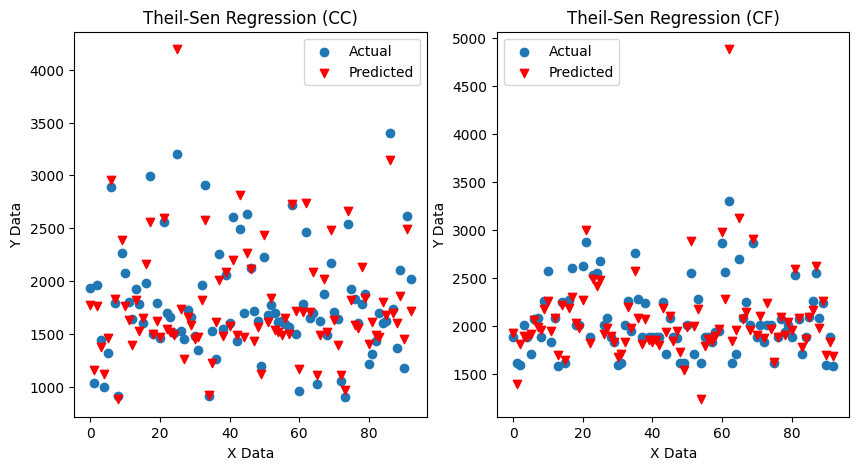

In [ ]:
indexer=np.arange(test_CCx.shape[0])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(indexer, test_CCy, label="Actual")
plt.scatter(indexer, predTSCC, label="Predicted", color='red', marker='v')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Theil-Sen Regression (CC)")
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(indexer, test_CFy, label="Actual")
plt.scatter(indexer, predTSCF, label="Predicted", color='red', marker='v')
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Theil-Sen Regression (CF)")
plt.legend()
plt.show()

## Theil-Sen Regression Model Evaluation

In [ ]:
print("Evaluation for Model CC-CF")
print("Mean Squared Error:", mean_squared_error(test_CCy, predTSCC))
print("Root Mean Square Error:", mean_squared_error(test_CCy, predTSCC)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CCy, predTSCC))
print("R2 Score:", r2_score(test_CCy, predTSCC))
print("Explained Variance Score:", explained_variance_score(test_CCy, predTSCC))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CCy) - predTSCC) / np.ravel(test_CCy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CCy) - predTSCC) / np.ravel(test_CCy)) * 100)
print('*'*100)
print("Evaluation for Model CF-CC")
print("Mean Squared Error:", mean_squared_error(test_CFy, predTSCC))
print("Root Mean Square Error:", mean_squared_error(test_CFy, predTSCC)**0.5)
print("Mean Absolute Error:", mean_absolute_error(test_CFy, predTSCC))
print("R2 Score:", r2_score(test_CFy, predTSCC))
print("Explained Variance Score:", explained_variance_score(test_CFy, predTSCC))
print("Mean Absolute Percentage Error:", np.mean(np.abs((np.ravel(test_CFy) - predTSCC) / np.ravel(test_CFy))) * 100)
print("Mean Percentage Error:", np.mean((np.ravel(test_CFy) - predTSCC) / np.ravel(test_CFy)) * 100)

Evaluation for Model CC-CF
Mean Squared Error: 45061.34916476778
Root Mean Square Error: 212.27658647332677
Mean Absolute Error: 160.70630509989994
R2 Score: 0.8269139223653676
Explained Variance Score: 0.8273959009639675
Mean Absolute Percentage Error: 8.990798902533395
Mean Percentage Error: -0.0424012360323814
****************************************************************************************************
Evaluation for Model CF-CC
Mean Squared Error: 377564.23504703795
Root Mean Square Error: 614.4625578886299
Mean Absolute Error: 492.1025249632761
R2 Score: -1.9805249602809232
Explained Variance Score: -1.3185626698604276
Mean Absolute Percentage Error: 22.848435186653905
Mean Percentage Error: 12.94342794807851


Note: LOESS wasnt't able to achieve appreciable result after multiple trials